In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out FutureWarnings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EDA

### Outcome

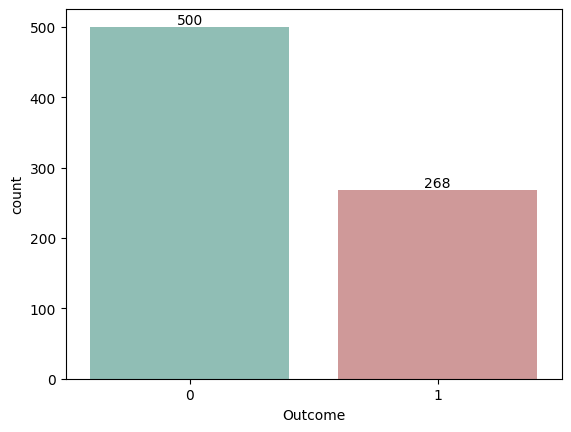

In [5]:
ax = sns.countplot(data=df, x="Outcome", alpha = 0.5, palette=['#138D75', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);

### Age

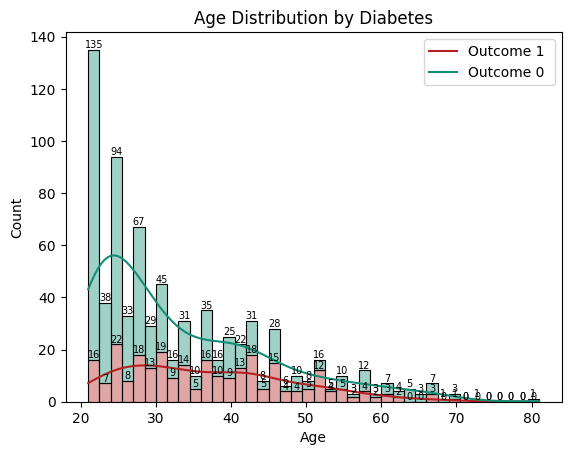

In [6]:
ax = sns.histplot(data=df, x='Age', hue='Outcome', bins=40, alpha=0.4, palette=['#138D75', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7);
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('Age Distribution by Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Outcome 1 ','Outcome 0'])
plt.show()

### Pregnancies

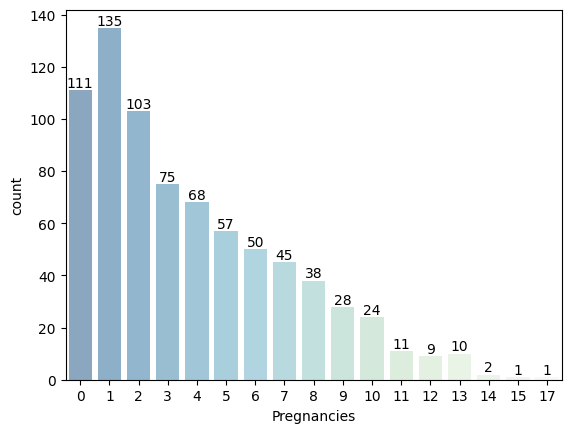

In [7]:
ax = sns.countplot(data=df, x="Pregnancies", alpha = 0.5, palette="GnBu_r")
ax.bar_label(ax.containers[0], fontsize=10);

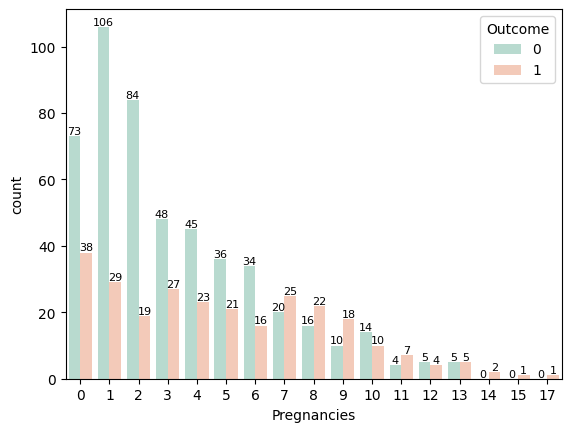

In [8]:
ax = sns.countplot(data=df, x="Pregnancies",hue="Outcome", alpha = 0.5, palette="Set2")
ax.bar_label(ax.containers[0], fontsize=8);
ax.bar_label(ax.containers[1], fontsize=8);

### Glucose

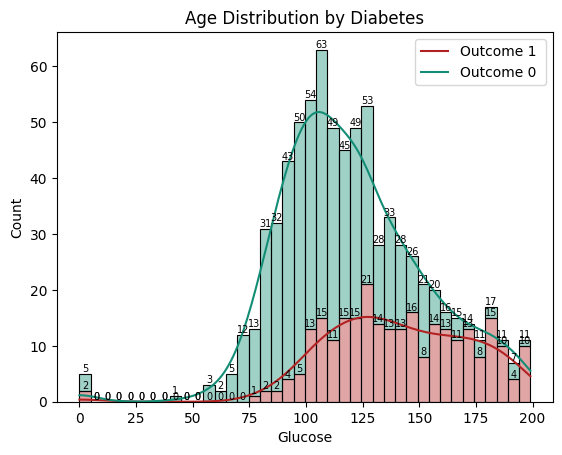

In [9]:
ax = sns.histplot(data=df, x='Glucose', hue='Outcome', bins=40, alpha=0.4, palette=['#138D75', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7);
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('Age Distribution by Diabetes')
plt.legend(labels=['Outcome 1 ','Outcome 0'])
plt.show()

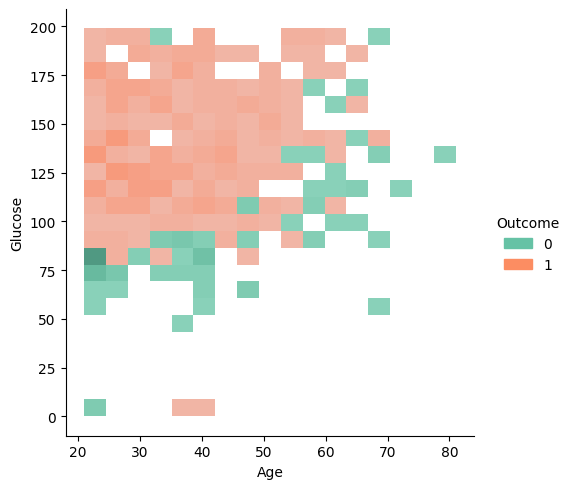

In [10]:
sns.displot(data=df, x="Age", y="Glucose",hue="Outcome", palette="Set2")

<Axes: xlabel='Age', ylabel='Glucose'>

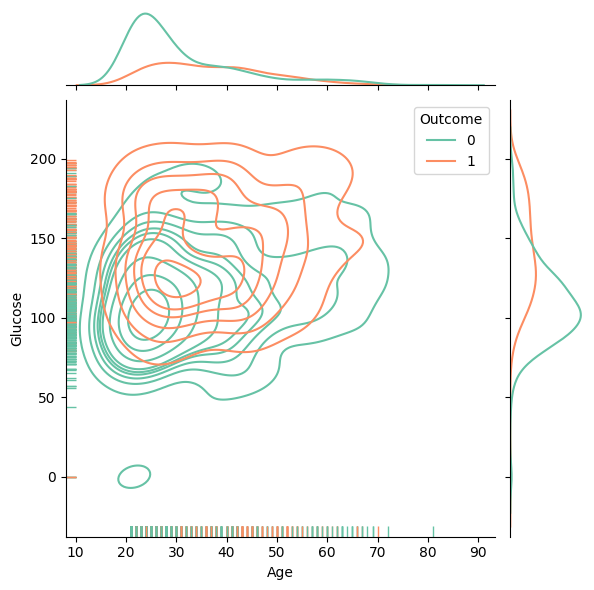

In [11]:
sns.jointplot(data=df, x="Age", y="Glucose",hue="Outcome", kind="kde", palette="Set2")
sns.rugplot(  data=df, x="Age", y="Glucose",hue="Outcome", palette="Set2")

### BloodPressure

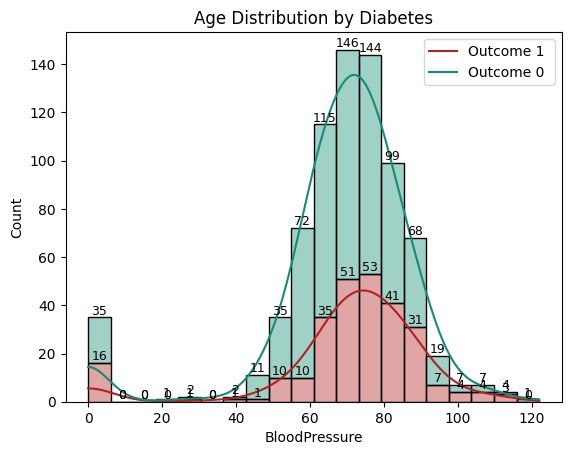

In [12]:
ax = sns.histplot(data=df, x='BloodPressure', hue='Outcome', bins=20, alpha=0.4, palette=['#138D75', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=9);
ax.bar_label(ax.containers[1], fontsize=9);

plt.title('Age Distribution by Diabetes')
plt.legend(labels=['Outcome 1 ','Outcome 0'])
plt.show()

### SkinThickness

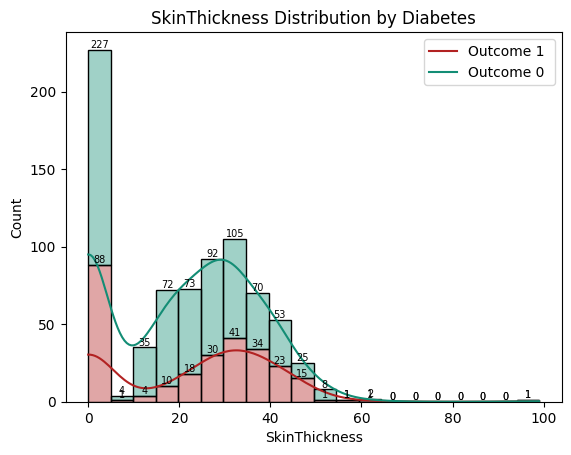

In [13]:
ax = sns.histplot(data=df, x='SkinThickness', hue='Outcome', bins=20, alpha=0.4, palette=['#138D75', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7);
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('SkinThickness Distribution by Diabetes')
plt.legend(labels=['Outcome 1 ','Outcome 0'])
plt.show()

### Insulin

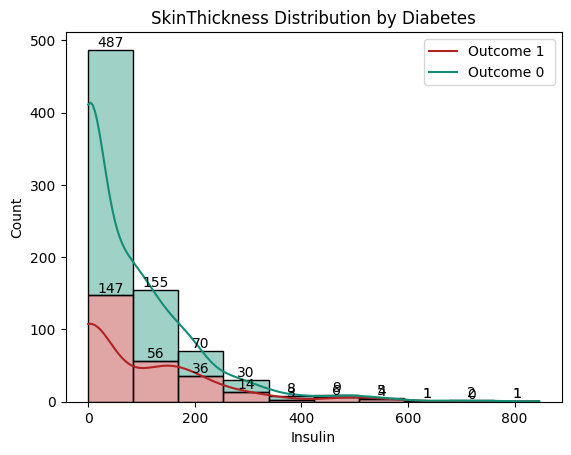

In [14]:
ax = sns.histplot(data=df, x='Insulin', hue='Outcome', bins=10, alpha=0.4, palette=['#138D75', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

plt.title('SkinThickness Distribution by Diabetes')
plt.legend(labels=['Outcome 1 ','Outcome 0'])
plt.show()

### BMI

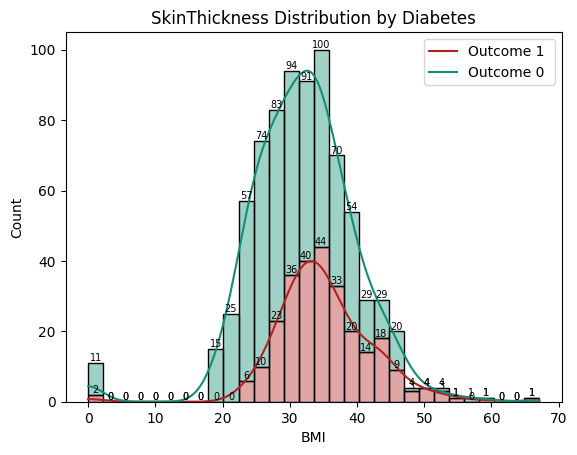

In [15]:
ax = sns.histplot(data=df, x='BMI', hue='Outcome', bins=30, alpha=0.4, palette=['#138D75', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7);
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('SkinThickness Distribution by Diabetes')
plt.legend(labels=['Outcome 1 ','Outcome 0'])
plt.show()

### DiabetesPedigreeFunction

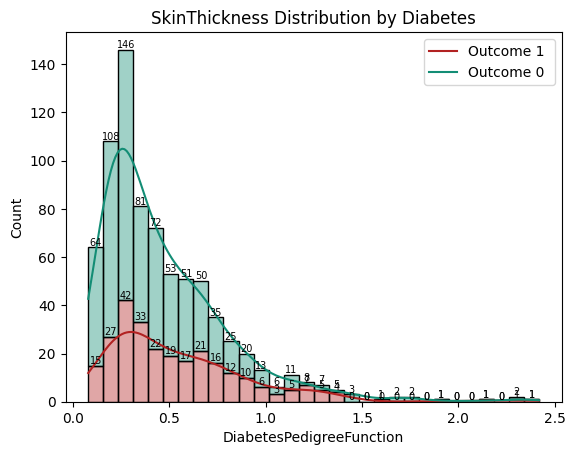

In [16]:
ax = sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', bins=30, alpha=0.4, palette=['#138D75', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7);
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('SkinThickness Distribution by Diabetes')
plt.legend(labels=['Outcome 1 ','Outcome 0'])
plt.show()

### all in a pair plot

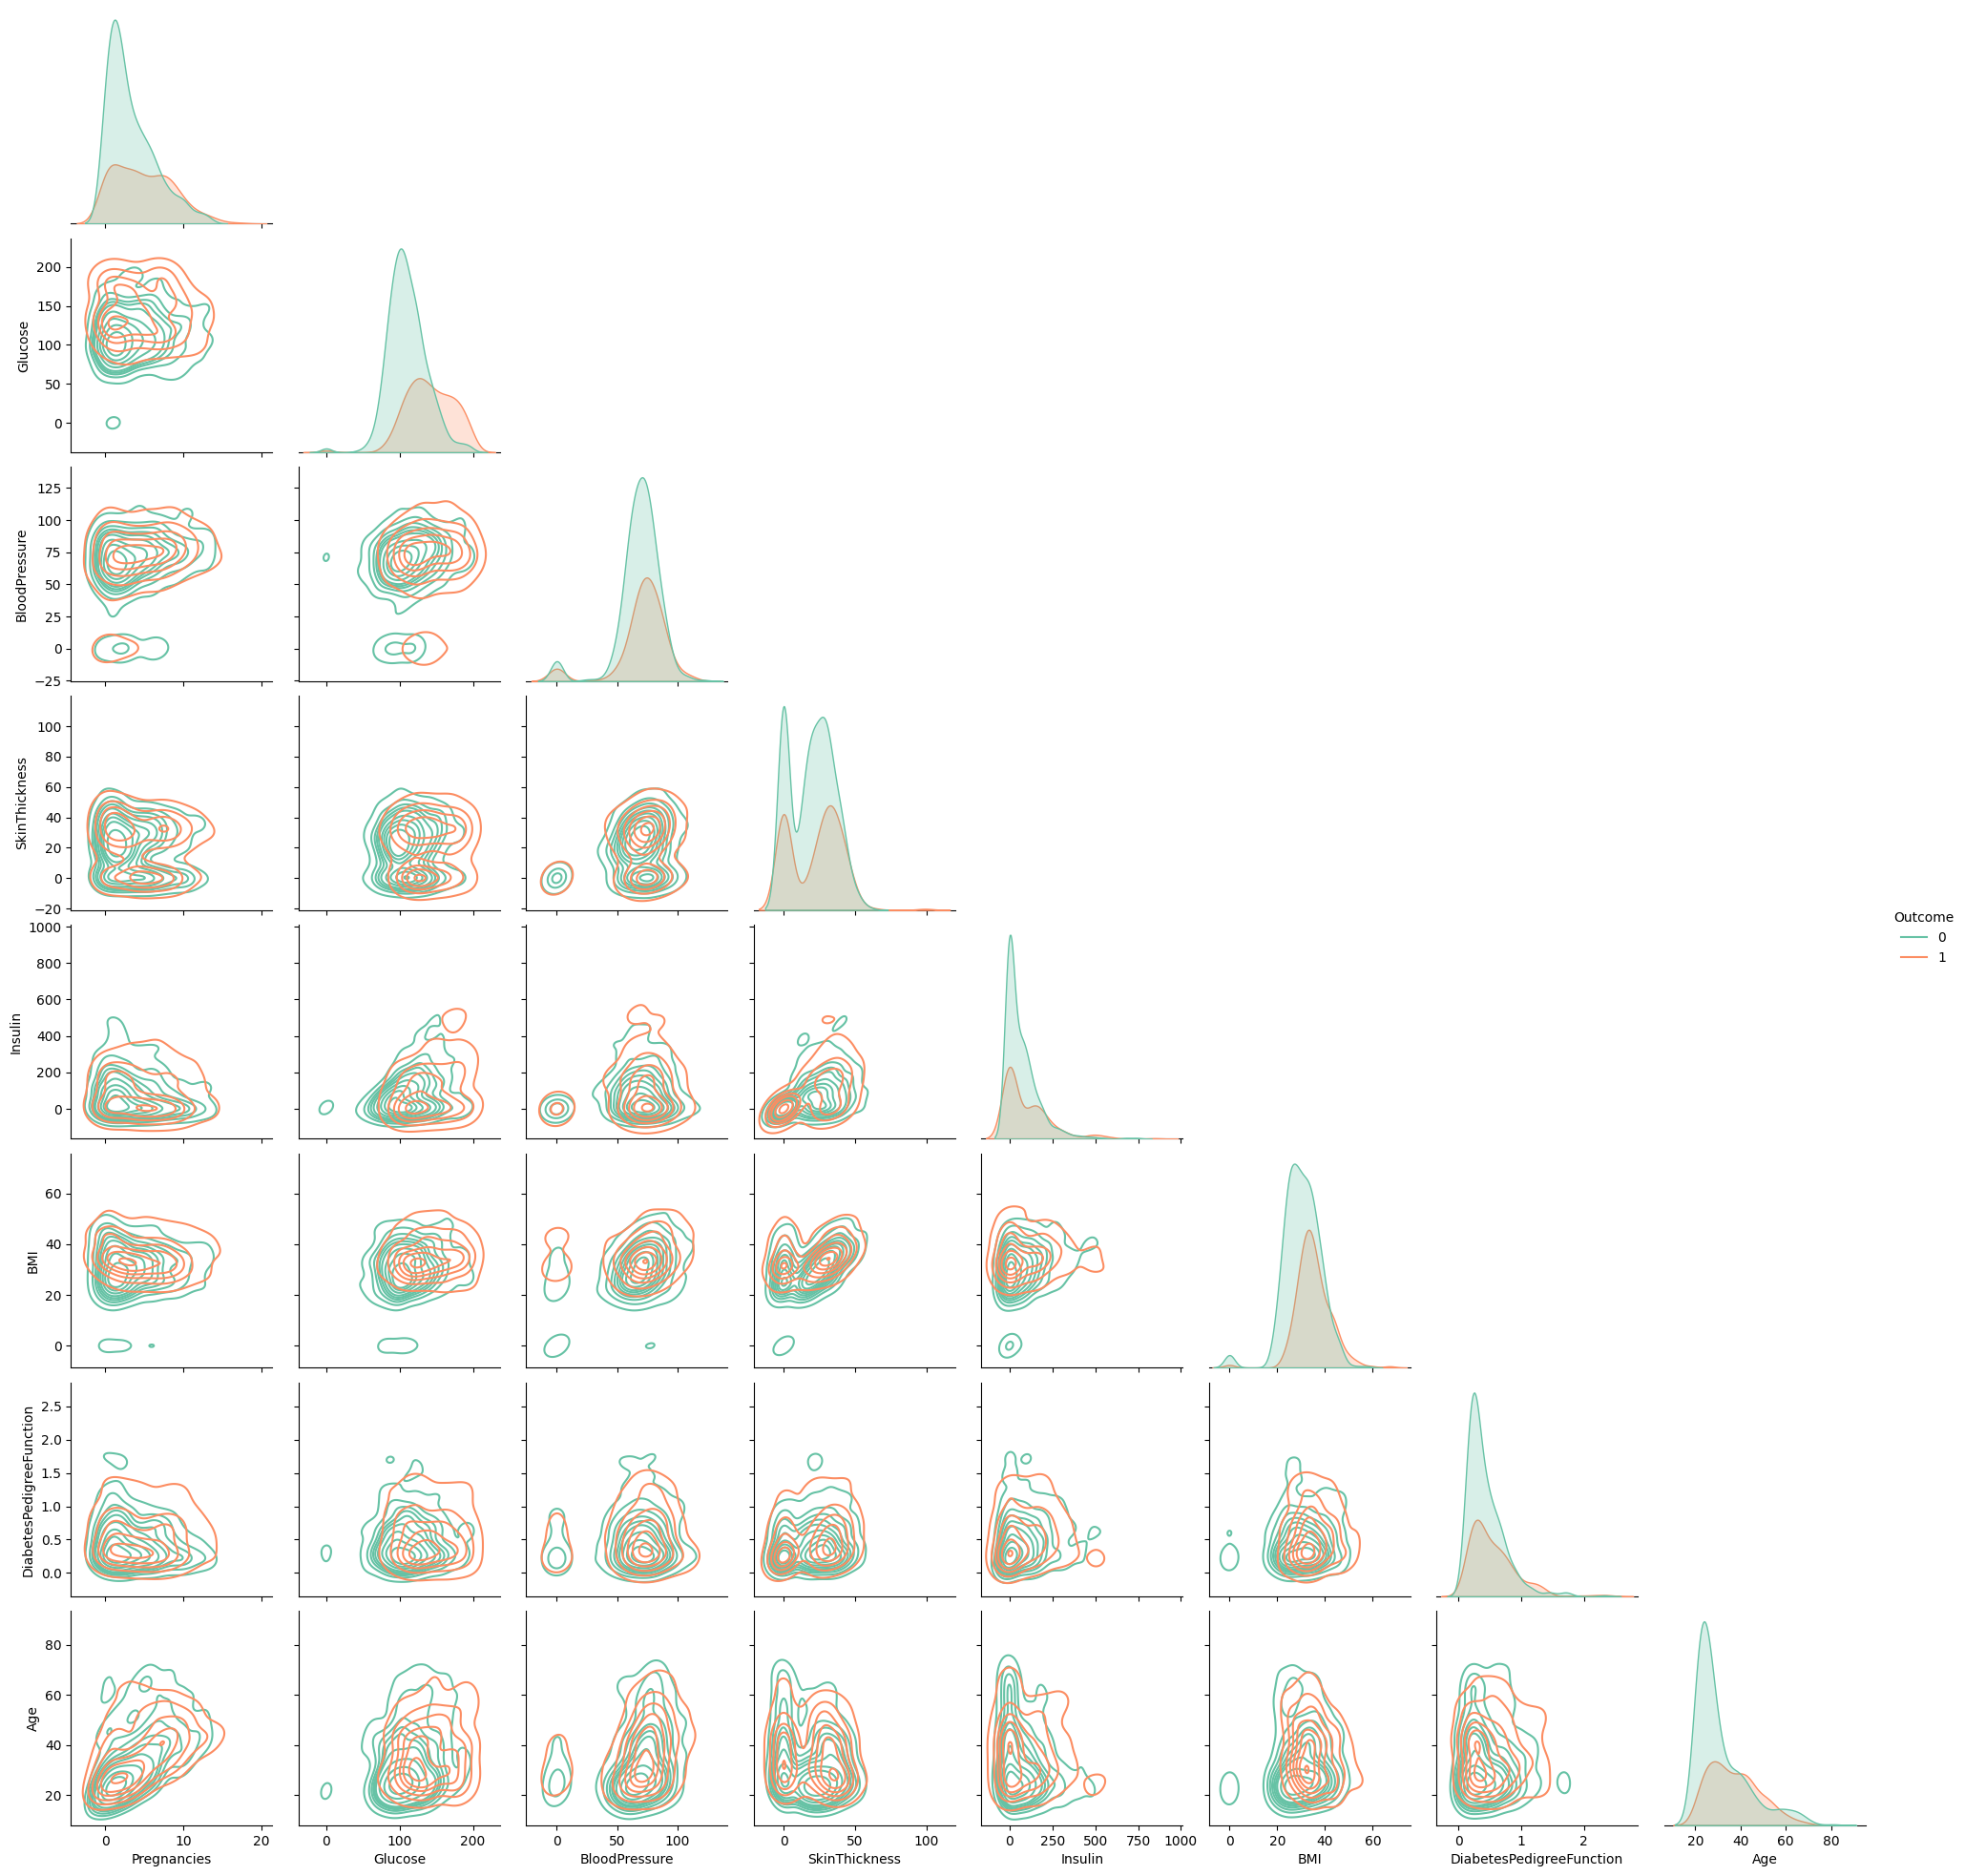

In [17]:
sns.pairplot(df, hue="Outcome",kind="kde", corner=True, palette="Set2")

# ```Outliers Detection and Remove ```

In [18]:
categoric_features = ["Pregnancies", "zero_pregnancy", "less_than_35", "between_7_9_pregnancy", "gluc_age", "gluc_more_100", "BM_less_20"]
numeric_features   = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction", "Age"]

In [19]:
y = df['Outcome'].copy()
X = df.drop(columns='Outcome', axis=1).copy()
X_= X.copy() # for before after outlier cleaning

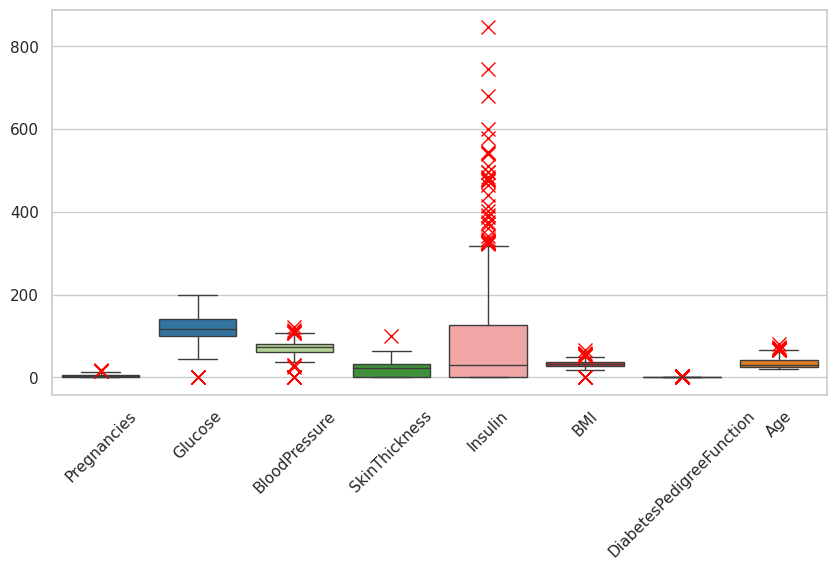

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
box = sns.boxplot(data=X, palette="Paired", linewidth=1, fliersize = 10 , flierprops={"marker": "x",  "markeredgecolor":"red"})
box.set_xticklabels(labels=box.get_xticklabels(),rotation=45);
plt.show()

In [21]:
from scipy.stats import shapiro

results = pd.DataFrame(columns=['Statistic', 'p-value', 'Normal Distribution'])
normal_columns = []

for column in X.columns:
    stat, p = shapiro(X[column])
    normal = p > 0.05     
    if normal == True:
        normal_columns.append(column)
        
    results.loc[column] = [stat, p, normal]

print(results)

                          Statistic       p-value  Normal Distribution
Pregnancies                0.904283  1.610010e-21                False
Glucose                    0.970105  1.987465e-11                False
BloodPressure              0.818923  1.584494e-28                False
SkinThickness              0.904628  1.751800e-21                False
Insulin                    0.722021  7.915340e-34                False
BMI                        0.949989  1.840759e-15                False
DiabetesPedigreeFunction   0.836519  2.477799e-27                False
Age                        0.874766  2.401830e-24                False


In [22]:
from scipy.stats import skew, kurtosis


results = pd.DataFrame(columns=['Skewness', 'Kurtosis', '5% Confidence Level'])
skewed_columns = []
not_skewed_columns = []

for column in X[numeric_features]:
    skewness = skew(X[column])
    kurt = kurtosis(X[column])
    
    crit_value = 1.96  # Normal dağılım için

    lower_skew = -crit_value * (6 / len(X)**0.5)
    upper_skew = crit_value * (6 / len(X)**0.5)

    lower_kurt = -crit_value * (24 / len(X)**0.5)
    upper_kurt = crit_value * (24 / len(X)**0.5)

    is_skewed = abs(skewness) > upper_skew or abs(skewness) < lower_skew
    results.loc[column] = [skewness, kurt, is_skewed]

    if is_skewed:
        skewed_columns.append(column)
    else :
        not_skewed_columns.append(column)

print("Skewness and Kurtosis Results:")
print(results)
print("\nSkewed Columns (at 5% significance level):")
print(skewed_columns)

Skewness and Kurtosis Results:
                          Skewness  Kurtosis  5% Confidence Level
Glucose                   0.173414  0.628813                False
BloodPressure            -1.840005  5.138691                 True
SkinThickness             0.109159 -0.524494                False
Insulin                   2.267810  7.159575                 True
BMI                      -0.428143  3.261257                 True
DiabetesPedigreeFunction  1.916159  5.550792                 True
Age                       1.127389  0.631177                 True

Skewed Columns (at 5% significance level):
['BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [23]:
Q1 = X[skewed_columns].quantile(0.25)
Q3 = X[skewed_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

outlier_indexes = np.where((X[skewed_columns] < lower_bound) | (X[skewed_columns] > upper_bound))

for col in skewed_columns:
    X.loc[outlier_indexes[0], col] = X[col].mean()

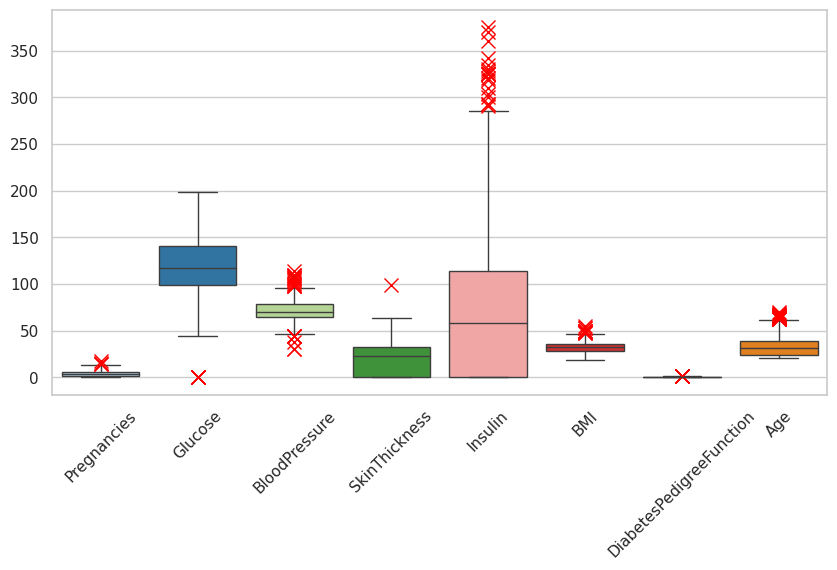

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=X, palette="Paired", linewidth=1, fliersize = 10 , flierprops={"marker": "x",  "markeredgecolor":"red"})
ax.set_xticklabels(labels=box.get_xticklabels(),rotation=45)
plt.show()

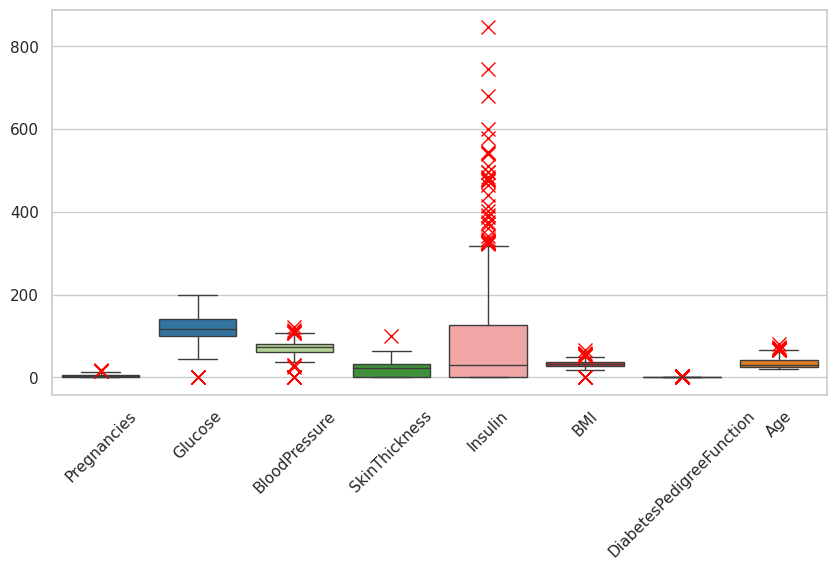

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=X_, palette="Paired", linewidth=1, fliersize = 10 , flierprops={"marker": "x",  "markeredgecolor":"red"})
ax.set_xticklabels(labels=box.get_xticklabels(),rotation=45)
plt.show()

# Feature Engineering

In [26]:
X = df.drop(columns='Outcome', axis=1).copy()
y = df['Outcome'].copy()
X_colmuns_name = X.columns

### Polynomial Features 

In [27]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X[numeric_features])

In [28]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[numeric_features])

df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(numeric_features), index=X.index)

X = pd.concat([X, df_poly.loc[:, ~df_poly.columns.isin(df.columns)]], axis=1)

In [29]:
pattern = '|'.join(numeric_features)  
poly_features = X.filter(regex=pattern)

In [30]:
poly_features

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Glucose^2  Glucose BloodPressure  \
0                       0.627   50    21904.0                10656.0   
1                       0.351   31     7225.0                 5610.0   
2                       0.672   32    33489.0                11712.0   
3                       0.167   21     7921.0                 5874.0   
4                       2.288   33    18769.0                 5480.0   
..                        ...  ...        ...                    ...   
763                     0.171   63    10201.0                 7676.0   
764                     0.340   27    14884.0                 8540.0   
765                     0.245   30    14641.0                 8712.0   
766                     0.349   47    15876.0                 7560.0   
767                     0.315   23     8649.0                 6510.0   

     Glucose SkinThickness  ...  Insulin^2  Insulin BMI  \
0                   5180.0  ...        0.0          0.0   
1                   2465.0  ...        0.0          0.0   
2                      0.0  ...        0.0          0.0   
3                   2047.0  ...     8836.0       2641.4   
4                   4795.0  ...    28224.0       7240.8   
..                     ...  ...        ...          ...   
763                 4848.0  ...    32400.0       5922.0   
764                 3294.0  ...        0.0          0.0   
765                 2783.0  ...    12544.0       2934.4   
766                    0.0  ...        0.0          0.0   
767                 2883.0  ...        0.0          0.0   

     Insulin DiabetesPedigreeFunction  Insulin Age    BMI^2  \
0                               0.000          0.0  1128.96   
1                               0.000          0.0   707.56   
2                               0.000          0.0   542.89   
3                              15.698       1974.0   789.61   
4                             384.384       5544.0  1857.61   
..                                ...          ...      ...   
763                            30.780      11340.0  1082.41   
764                             0.000          0.0  1354.24   
765                            27.440       3360.0   686.44   
766                             0.000          0.0   906.01   
767                             0.000          0.0   924.16   

     BMI DiabetesPedigreeFunction  BMI Age  DiabetesPedigreeFunction^2  \
0                         21.0672   1680.0                    0.393129   
1                          9.3366    824.6                    0.123201   
2                         15.6576    745.6                    0.451584   
3                          4.6927    590.1                    0.027889   
4                         98.6128   1422.3                    5.234944   
..                            ...      ...                         ...   
763                        5.6259   2072.7                    0.029241   
764                       12.5120    993.6                    0.115600   
765                        6.4190    786.0                    0.060025   
766                       10.5049   1414.7                    0.121801   
767                        9.5760    699.2                    0.099225   

     DiabetesPedigreeFunction Age   Age^2  
0       

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[poly_features.columns] = scaler.fit_transform(poly_features[poly_features.columns])

In [32]:
X["between_7_9_pregnancy"] = (X["Pregnancies"] >= 7) & (X["Pregnancies"] <= 9)
X["zero_pregnancy"]   = X["Pregnancies"] <= 0
X["less_than_35"]     = X["Age"] < 36
X["glucose_more_100"] = X["Glucose"] > 100
X["glucose_age"]      = (X["Glucose"] > 100) & ((X["Age"] > 40) & (X["Age"] < 55))
X["BMI_less_20"]      = X["BMI"] <= 22 

In [33]:
X = pd.DataFrame(X)
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  0.848324       0.149641       0.907270 -0.692891  0.204013   
1              1 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2              8  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3              1 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4              0  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763           10 -0.622642       0.356432       1.722735  0.870031  0.115169   
764            2  0.034598       0.046245       0.405445 -0.692891  0.610154   
765            5  0.003301       0.149641       0.154533  0.279594 -0.735190   
766            1  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767            1 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  Glucose^2  Glucose BloodPressure  \
0                    0.468492  1.425995   0.776443               0.626882   
1                   -0.365061 -0.190672  -1.042023              -0.806255   
2                    0.604397 -0.105584   2.211617               0.926802   
3                   -0.920763 -1.041549  -0.955801              -0.731275   
4                    5.484909 -0.020496   0.388073              -0.843177   
..                        ...       ...        ...                    ...   
763                 -0.908682  2.532136  -0.673349              -0.219481   
764                 -0.398282 -0.531023  -0.093210               0.025907   
765                 -0.685193 -0.275760  -0.123313               0.074758   
766                 -0.371101  1.170732   0.029682              -0.252427   
767                 -0.473785 -0.871374  -0.865615              -0.550642   

     ...   BMI Age  DiabetesPedigreeFunction^2  DiabetesPedigreeFunction Age  \
0    ...  1.356353                    0.107576                      1.202461   
1    ... -0.535783                   -0.369814                     -0.382029   
2    ... -0.710530                    0.210959                      0.440289   
3    ... -1.054495                   -0.538382                     -0.952845   
4    ...  0.786324                    8.670733                      4.620388   
..   ...       ...                         ...                           ...   
763  ...  2.225002                   -0.535991                     -0.390389   
764  ... -0.161957                   -0.383257                     -0.513702   
765  ... -0.621166                   -0.481546                     -0.655361   
766  ...  0.769512                   -0.372290                      0.045425   
767  ... -0.813166                   -0.412218                     -0.663489   

        Age^2  between_7_9_pregnancy  zero_pregnancy  less_than_35  \
0    1.321967                  False           False          True   
1   -0.296677                  False           False          True   
2   -0.230417                   True           False          True   
3   -0.843588                  False           False          True   
4   -0.162053                  False            True          True   
..        ...                    ...             ...           ...   
763  2.866989                  False           False          True   
764 -0.540683                  False           False          True   
765 -0.360834                  False           False          True   
766  1.015908                  False           False          True   
767 -0.751034                  False           False          True   

     glucose_more_100  glucose_age  BMI_less_20  
0               False        False         True  
1               False        False         True  
2               False        False         True  
3               False        False         True  
4               False        False         True  
..               

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

```let's build a SVM model with diffrent Hyperparameters```

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hinge_loss

svc = SVC()

In [36]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear'], 
    'gamma': [0.1, 1, 10, 100],
    'degree':[1,2,3,5],
    'probability':[True, False],
    'random_state' :[42]
}
param_grid = {'C': [1], 'degree': [1], 'gamma': [0.1], 'kernel': ['linear'], 'probability': [True], 'random_state': [42]}

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_model_lin = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_lr = cross_val_score(best_model_lin, X_test, y_test, cv = 10)
print("Test Accuracy:", round(svm_scores_lr.mean(), 2))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear', 'probability': True, 'random_state': 42}
Test Accuracy: 0.82


In [37]:
y_test_pred  = best_model_lin.predict(X_test)

print("\n##--linear Kernel Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--linear Kernel Test Result--##

Test Scores
Accuracy: 0.7987012987012987
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

Confusion Matrix:
 [[89 10]
 [21 34]]


In [38]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['rbf'], 
    'gamma': [0.1, 1, 10, 100],
    'degree':[1,2,3,5],
    'probability':[True, False],
    'random_state' :[42]
}
param_grid = {'C': [1], 'degree': [1], 'gamma': [0.1], 'kernel': ['rbf'], 'probability': [True], 'random_state': [42]}

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_model_rbf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_rbf = cross_val_score(best_model_rbf, X_test, y_test, cv = 10)
print("Test Accuracy:", round(svm_scores_rbf.mean(), 2))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True, 'random_state': 42}
Test Accuracy: 0.73


In [39]:
y_test_pred  = best_model_rbf.predict(X_test)

print("\n##--RBF kernel Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--RBF kernel Test Result--##

Test Scores
Accuracy: 0.6883116883116883
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.57      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

Confusion Matrix:
 [[76 23]
 [25 30]]


In [40]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['poly'], 
    'gamma': [0.1, 1, 10, 100],
    'degree':[1,2,3,5],
    'probability':[True, False],
    'random_state' :[42]
}
param_grid = {'C': [10], 'degree': [1], 'gamma': [1], 'kernel': ['poly'], 'probability': [True], 'random_state': [42]}

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_model_poly = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_poly = cross_val_score(best_model_poly, X_test, y_test, cv = 10)
print("Test Accuracy:", round(svm_scores_poly.mean(), 2))

Best Parameters: {'C': 10, 'degree': 1, 'gamma': 1, 'kernel': 'poly', 'probability': True, 'random_state': 42}
Test Accuracy: 0.74


In [41]:
y_test_pred  = best_model_poly.predict(X_test)

print("\n##--poly kernel Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--poly kernel Test Result--##

Test Scores
Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Confusion Matrix:
 [[87 12]
 [22 33]]


In [42]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['sigmoid'], 
    'gamma': [0.1, 1, 10, 100],
    'degree':[1,2],
    'probability':[True, False],
    'random_state' :[42]
}
param_grid = {'C':[0.1], "degree":[1], 'gamma': [0.1], 'kernel': ['sigmoid'], 'probability': [True], 'random_state': [42]}

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 2, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_model_sigmoid = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_sigmoid = cross_val_score(best_model_sigmoid, X_test, y_test, cv = 10)
print("Test Accuracy:", round(svm_scores_sigmoid.mean(), 2))

Best Parameters: {'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid', 'probability': True, 'random_state': 42}
Test Accuracy: 0.64


In [43]:
y_test_pred  = best_model_sigmoid.predict(X_test)

print("\n##--sigmoid kernel Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--sigmoid kernel Test Result--##

Test Scores
Accuracy: 0.6038961038961039
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        99
           1       0.44      0.42      0.43        55

    accuracy                           0.60       154
   macro avg       0.56      0.56      0.56       154
weighted avg       0.60      0.60      0.60       154

Confusion Matrix:
 [[70 29]
 [32 23]]


### ``` It's look like best model is Linear Kernel. Accuracy: 0.80```

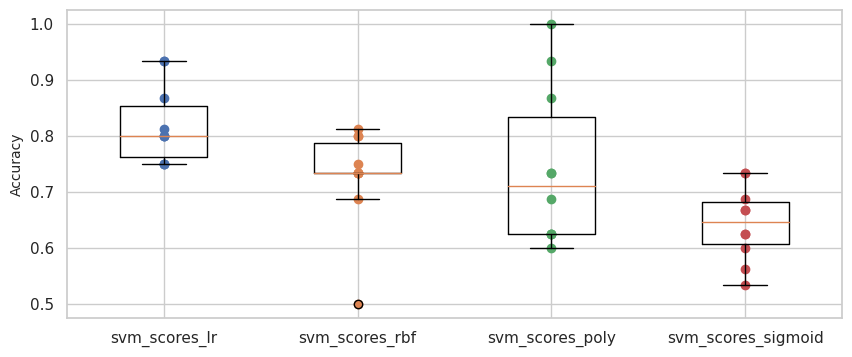

In [44]:
plt.figure(figsize=(10, 4))
plt.plot([1]*10, svm_scores_lr,     ".",markersize=12)
plt.plot([2]*10, svm_scores_rbf,    ".",markersize=12)
plt.plot([3]*10, svm_scores_poly,   ".",markersize=12)
plt.plot([4]*10, svm_scores_sigmoid,".",markersize=12)
plt.boxplot([svm_scores_lr, svm_scores_rbf, svm_scores_poly, svm_scores_sigmoid], labels=("svm_scores_lr","svm_scores_rbf", "svm_scores_poly", "svm_scores_sigmoid"))
plt.ylabel("Accuracy", fontsize=10)
plt.show()

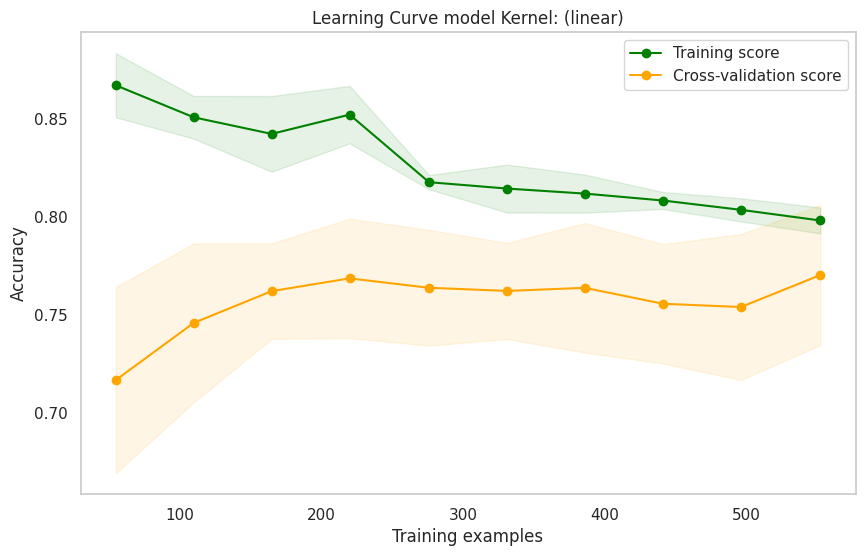

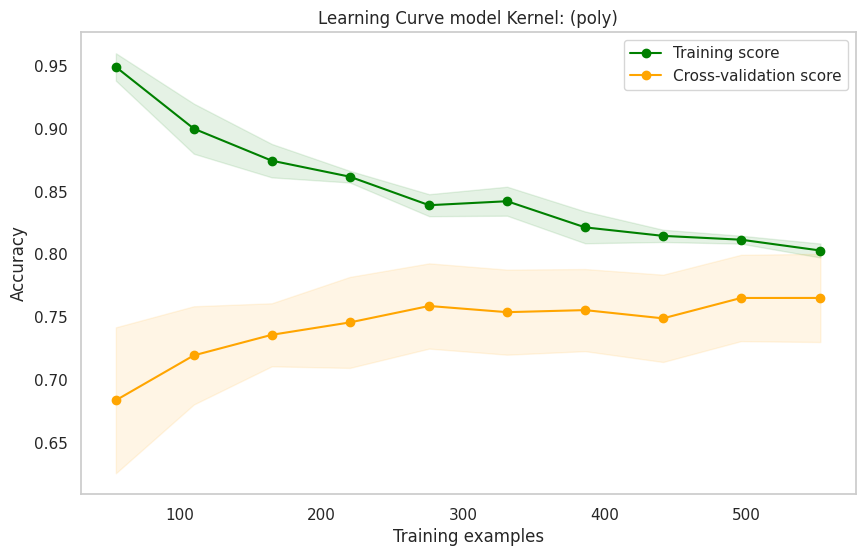

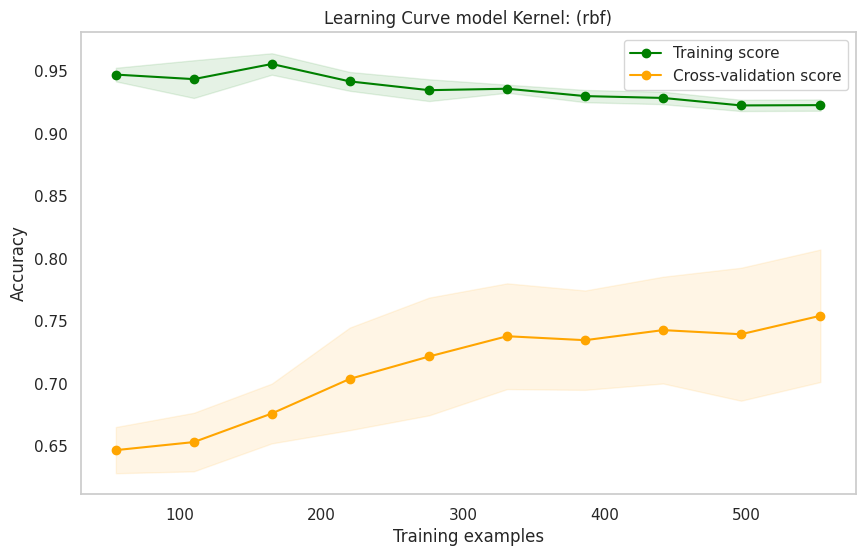

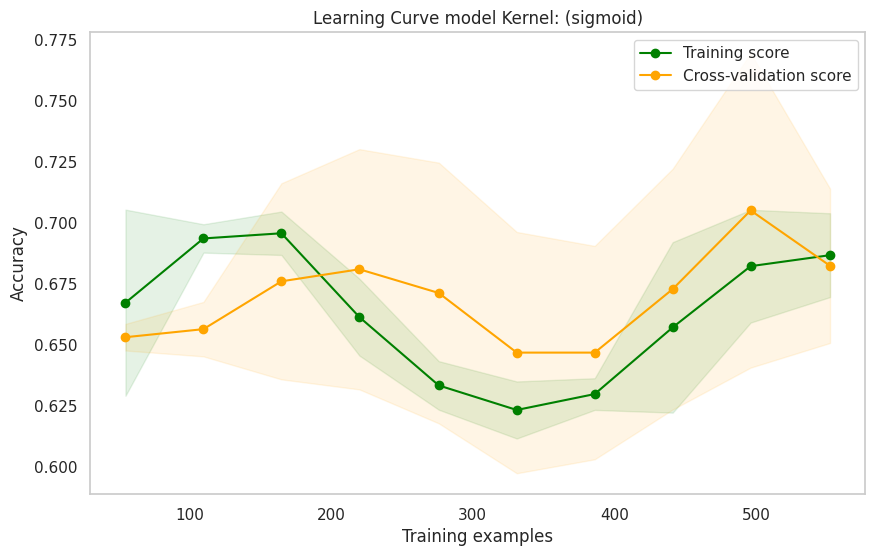

In [45]:
for i in [best_model_lin, best_model_poly, best_model_rbf, best_model_sigmoid]:
    train_sizes, train_scores, test_scores = learning_curve(i, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,color="green")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="green", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.title(f"Learning Curve model Kernel: ({i.kernel})")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [46]:
support_vectors = pd.DataFrame(best_model_lin.support_vectors_, columns=X.columns)

# Visualizing Decision Boundaries with Diffrent Kernels and Hyperparameters

## RBF Kernel

### Firstly, we will examine the combination of gamma and C Hyperparametes

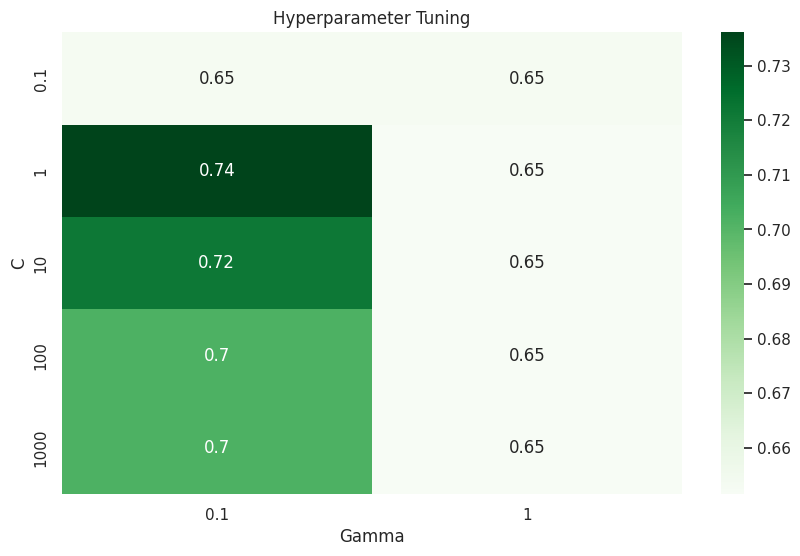

In [47]:
gamma_values = [0.1, 1]
C_values = [0.1, 1, 10, 100, 1000]

svc = SVC(kernel='rbf')
param_grid = {'C': C_values, 'gamma': gamma_values, 'random_state': [42]}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']
scores = scores.reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="Greens")
plt.title('Hyperparameter Tuning')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

### Different ***gamma*** values on RBF kernel


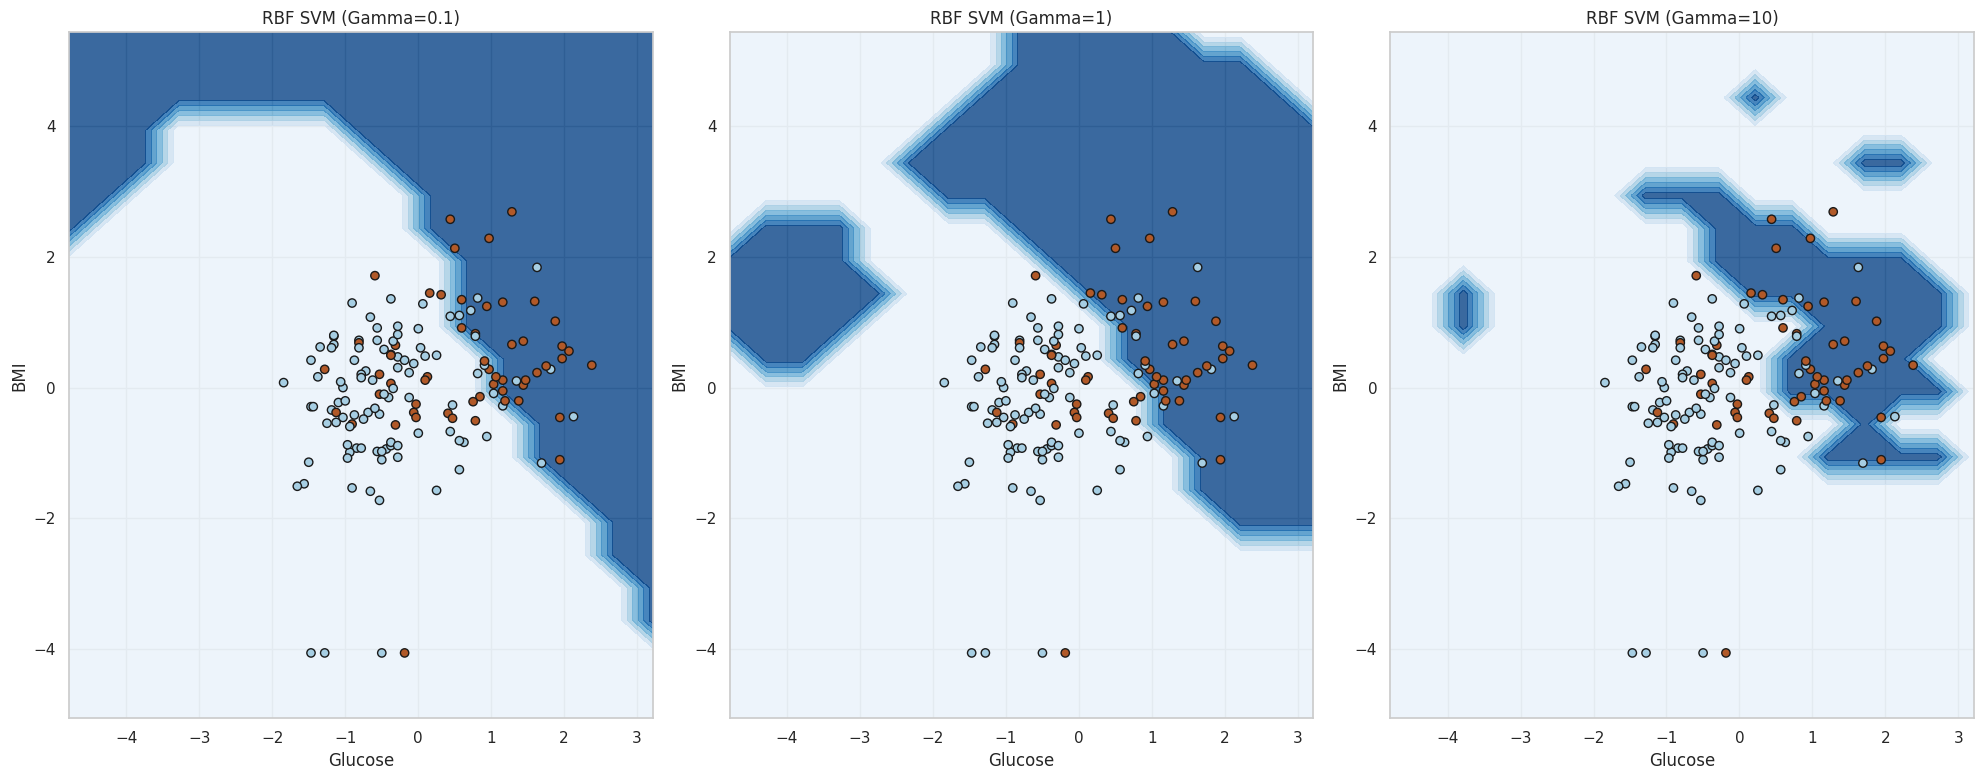

In [48]:
X_train_vis = X_train[['Glucose', 'BMI']].values
X_test_vis  = X_test[['Glucose',  'BMI']].values

gamma_values = [0.1, 1, 10]

plt.figure(figsize=(20, 15))
for i, gamma in enumerate(gamma_values, 1):
    clf_rbf = SVC(C= 1, degree= 1,  kernel= 'rbf', probability= True, random_state= 42, gamma=gamma)
    clf_rbf.fit(X_train_vis, y_train)

    h = 0.5 
    x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
    y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Blues, alpha=0.8)
    plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(f'RBF SVM (Gamma={gamma})')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
plt.tight_layout()
plt.show()

### Diffrent ***C*** values on RBF kernel

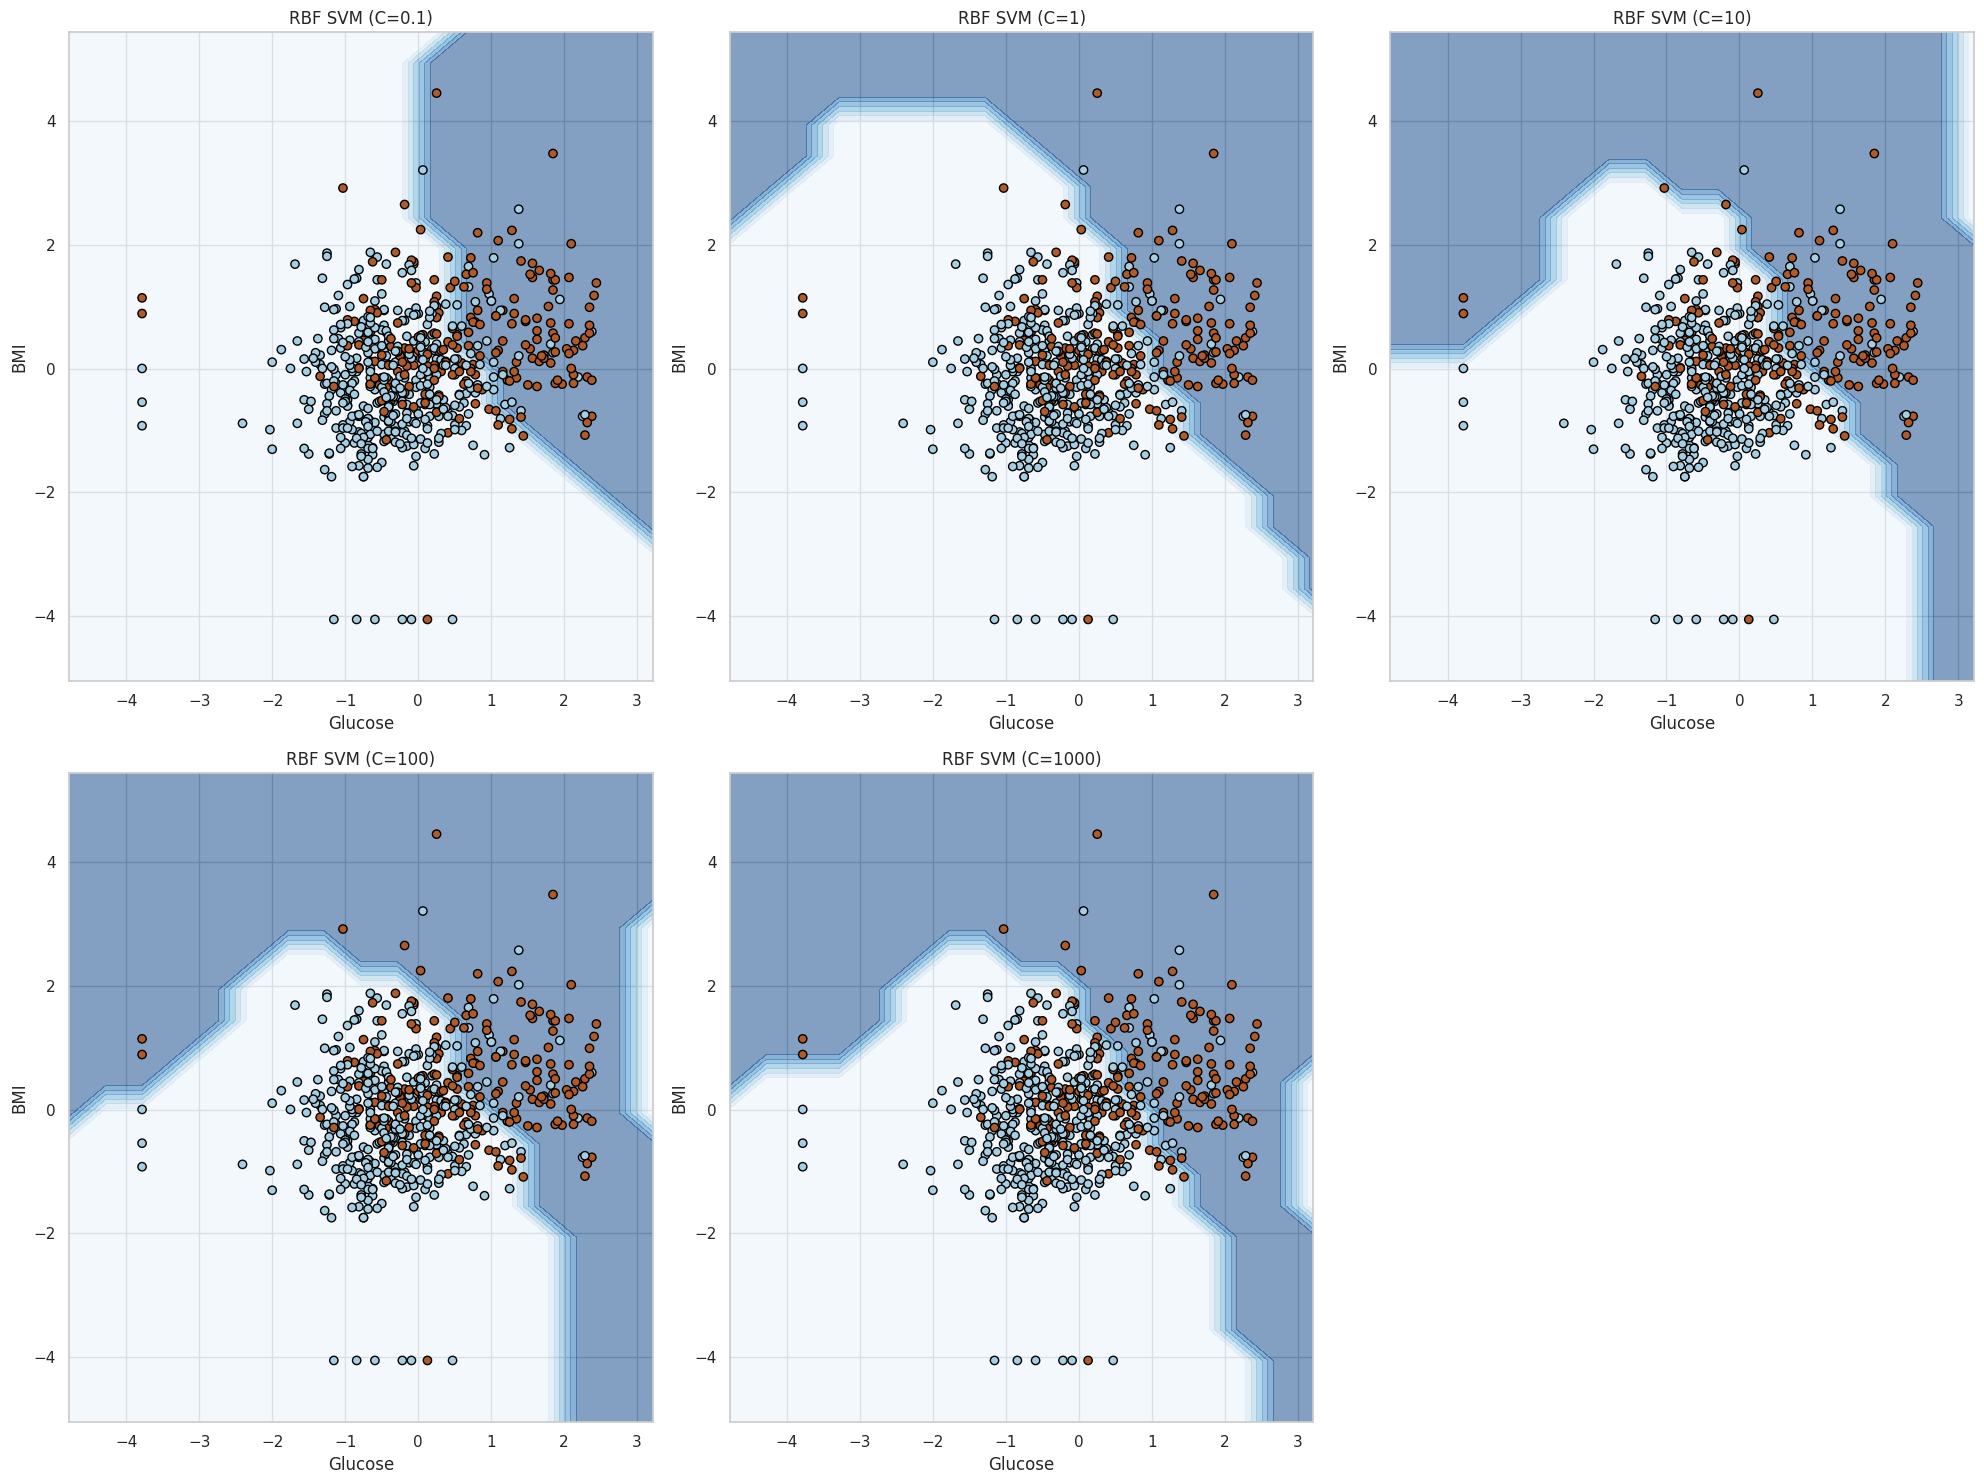

In [49]:
C_values = [0.1, 1, 10, 100, 1000]

plt.figure(figsize=(20, 15))
for i, C in enumerate(C_values, 1):

    clf_rbf = SVC(C= C, degree= 1,  kernel= 'rbf', probability= True, random_state= 42, gamma=0.1)
    clf_rbf.fit(X_train_vis, y_train)

    h = 0.5 
    x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
    y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Blues, alpha=0.5)
    plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='black')
    plt.title(f'RBF SVM (C={C})')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

### Combinations of C and gamma values on Diffrent Kernels

``` (recall) Best Parameters for rbf kernel: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True, 'random_state': 42}```
```Test Accuracy: 0.73```


#### RBF Kernel whit Glucose and BMI features

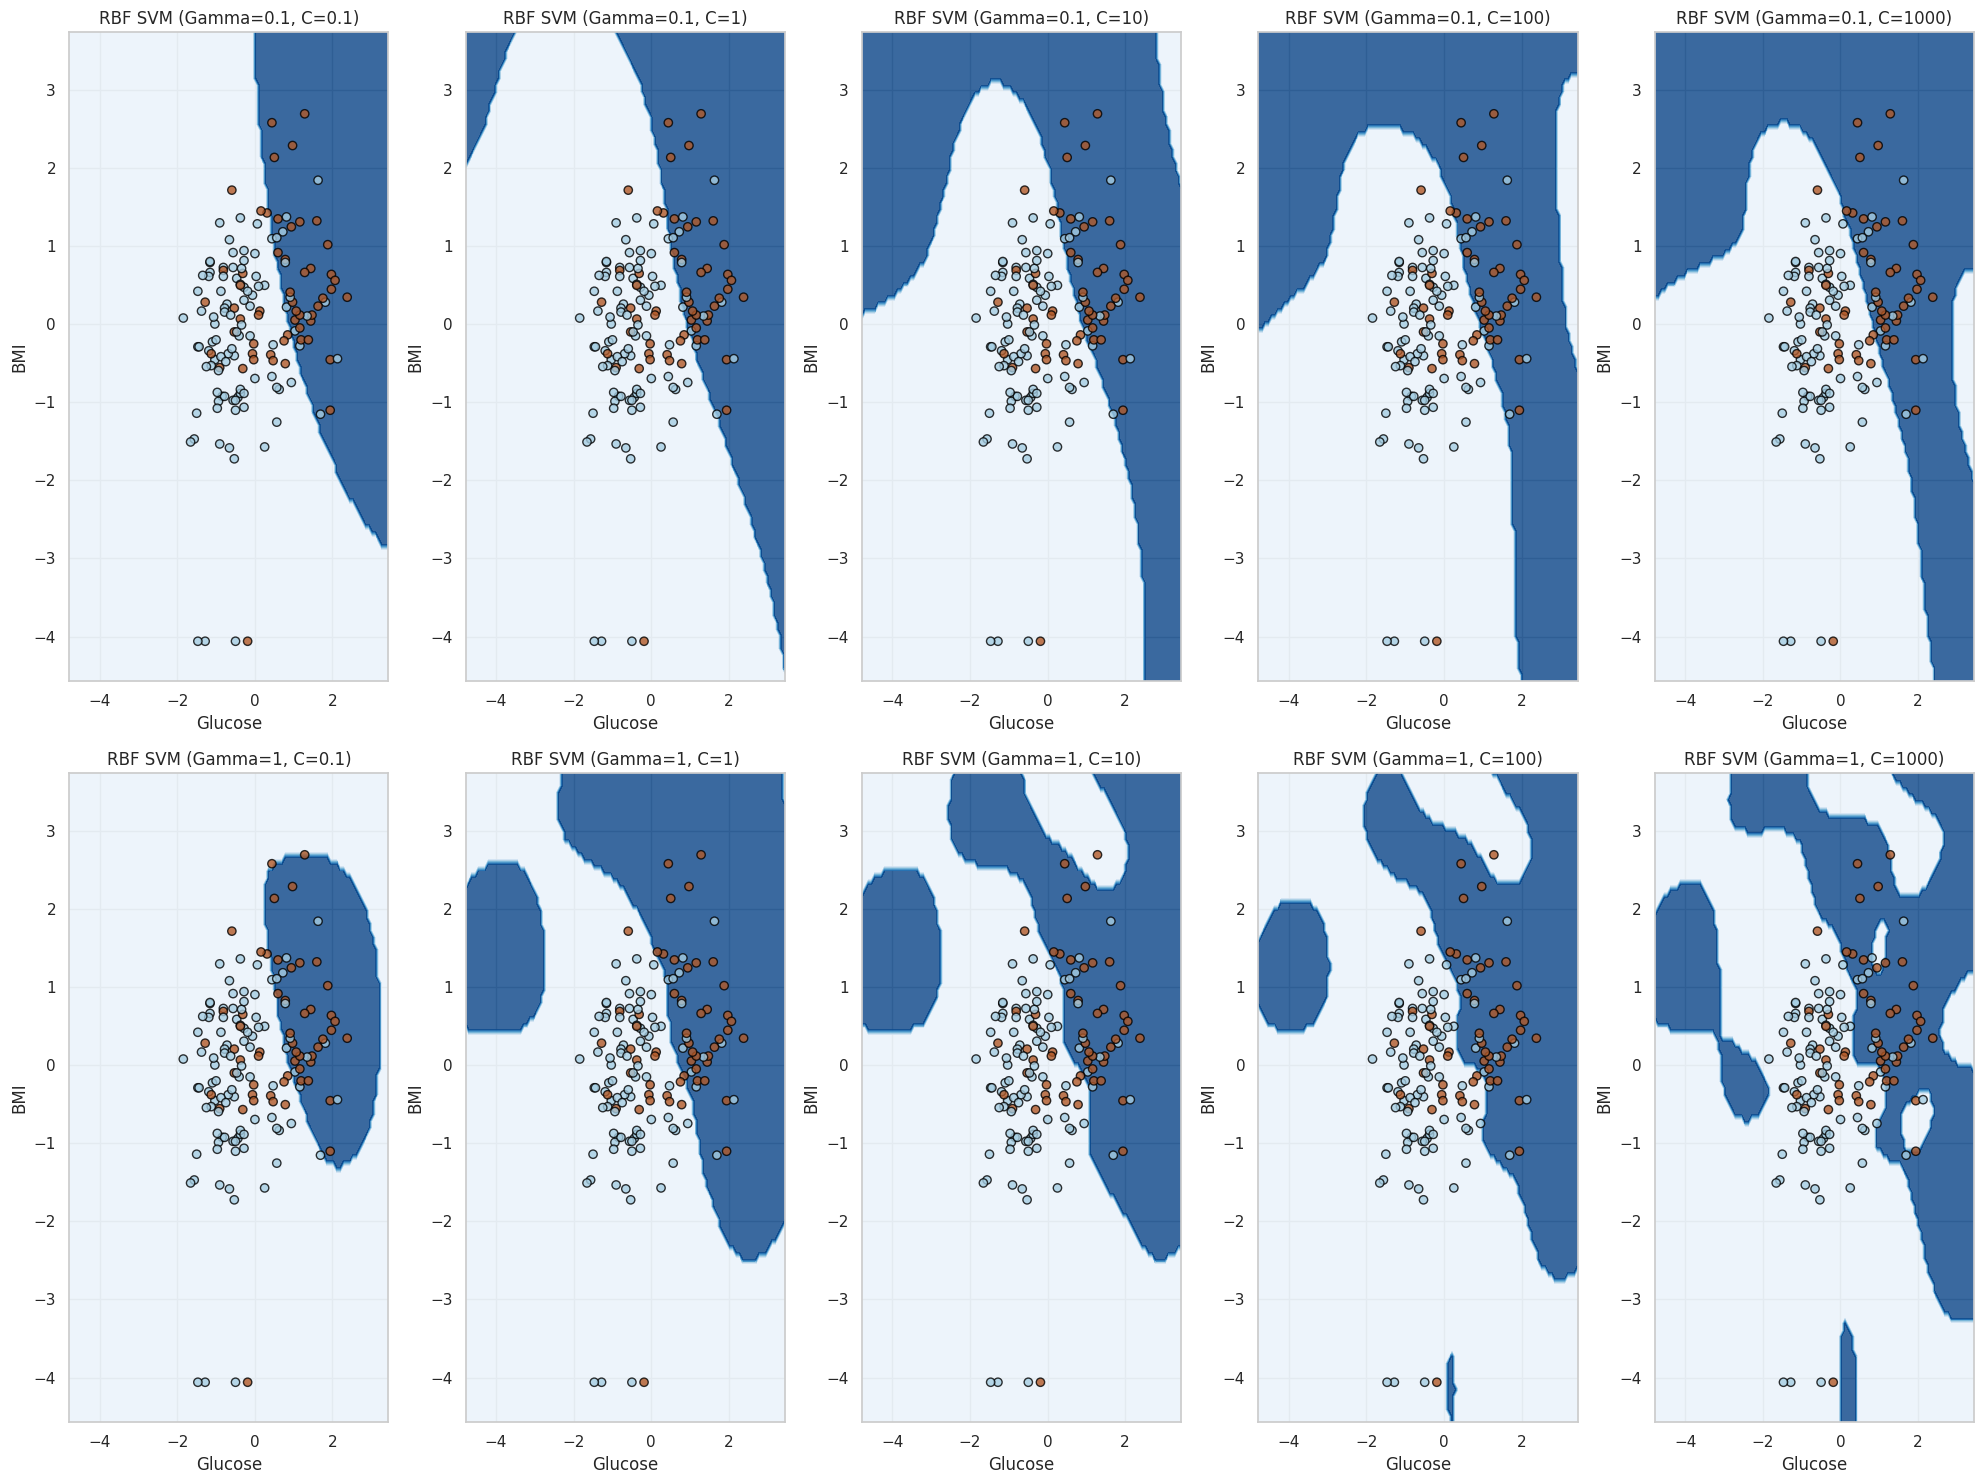

In [50]:
X_train_vis = X_train[['Glucose', 'BMI']].values
X_test_vis  = X_test[['Glucose',  'BMI']].values

gamma_values = [0.1, 1]
C_values = [0.1, 1, 10, 100, 1000]

plt.figure(figsize=(20, 15))
subplot_index = 1

for gamma in gamma_values:
    for C in C_values:
        clf_rbf = SVC(degree= 1,  kernel= 'rbf', probability= True, random_state= 42, gamma=gamma, C=C)
        clf_rbf.fit(X_train_vis, y_train)

        x_min, x_max = X_train[numeric_features].iloc[:, 0].min() - 1, X_train[numeric_features].iloc[:, 0].max() + 1
        y_min, y_max = X_train[numeric_features].iloc[:, 1].min() - 1, X_train[numeric_features].iloc[:, 1].max() + 1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z_rbf = Z_rbf.reshape(xx.shape)
        
        plt.subplot(len(gamma_values), len(C_values), subplot_index)
        plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Blues, alpha=0.8)
        plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='black', alpha = 0.8)
        plt.title(f'RBF SVM (Gamma={gamma}, C={C})')
        plt.xlabel('Glucose')
        plt.ylabel('BMI')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
        subplot_index += 1

plt.tight_layout()
plt.show()


``` whit Glucose and BloodPressure features```

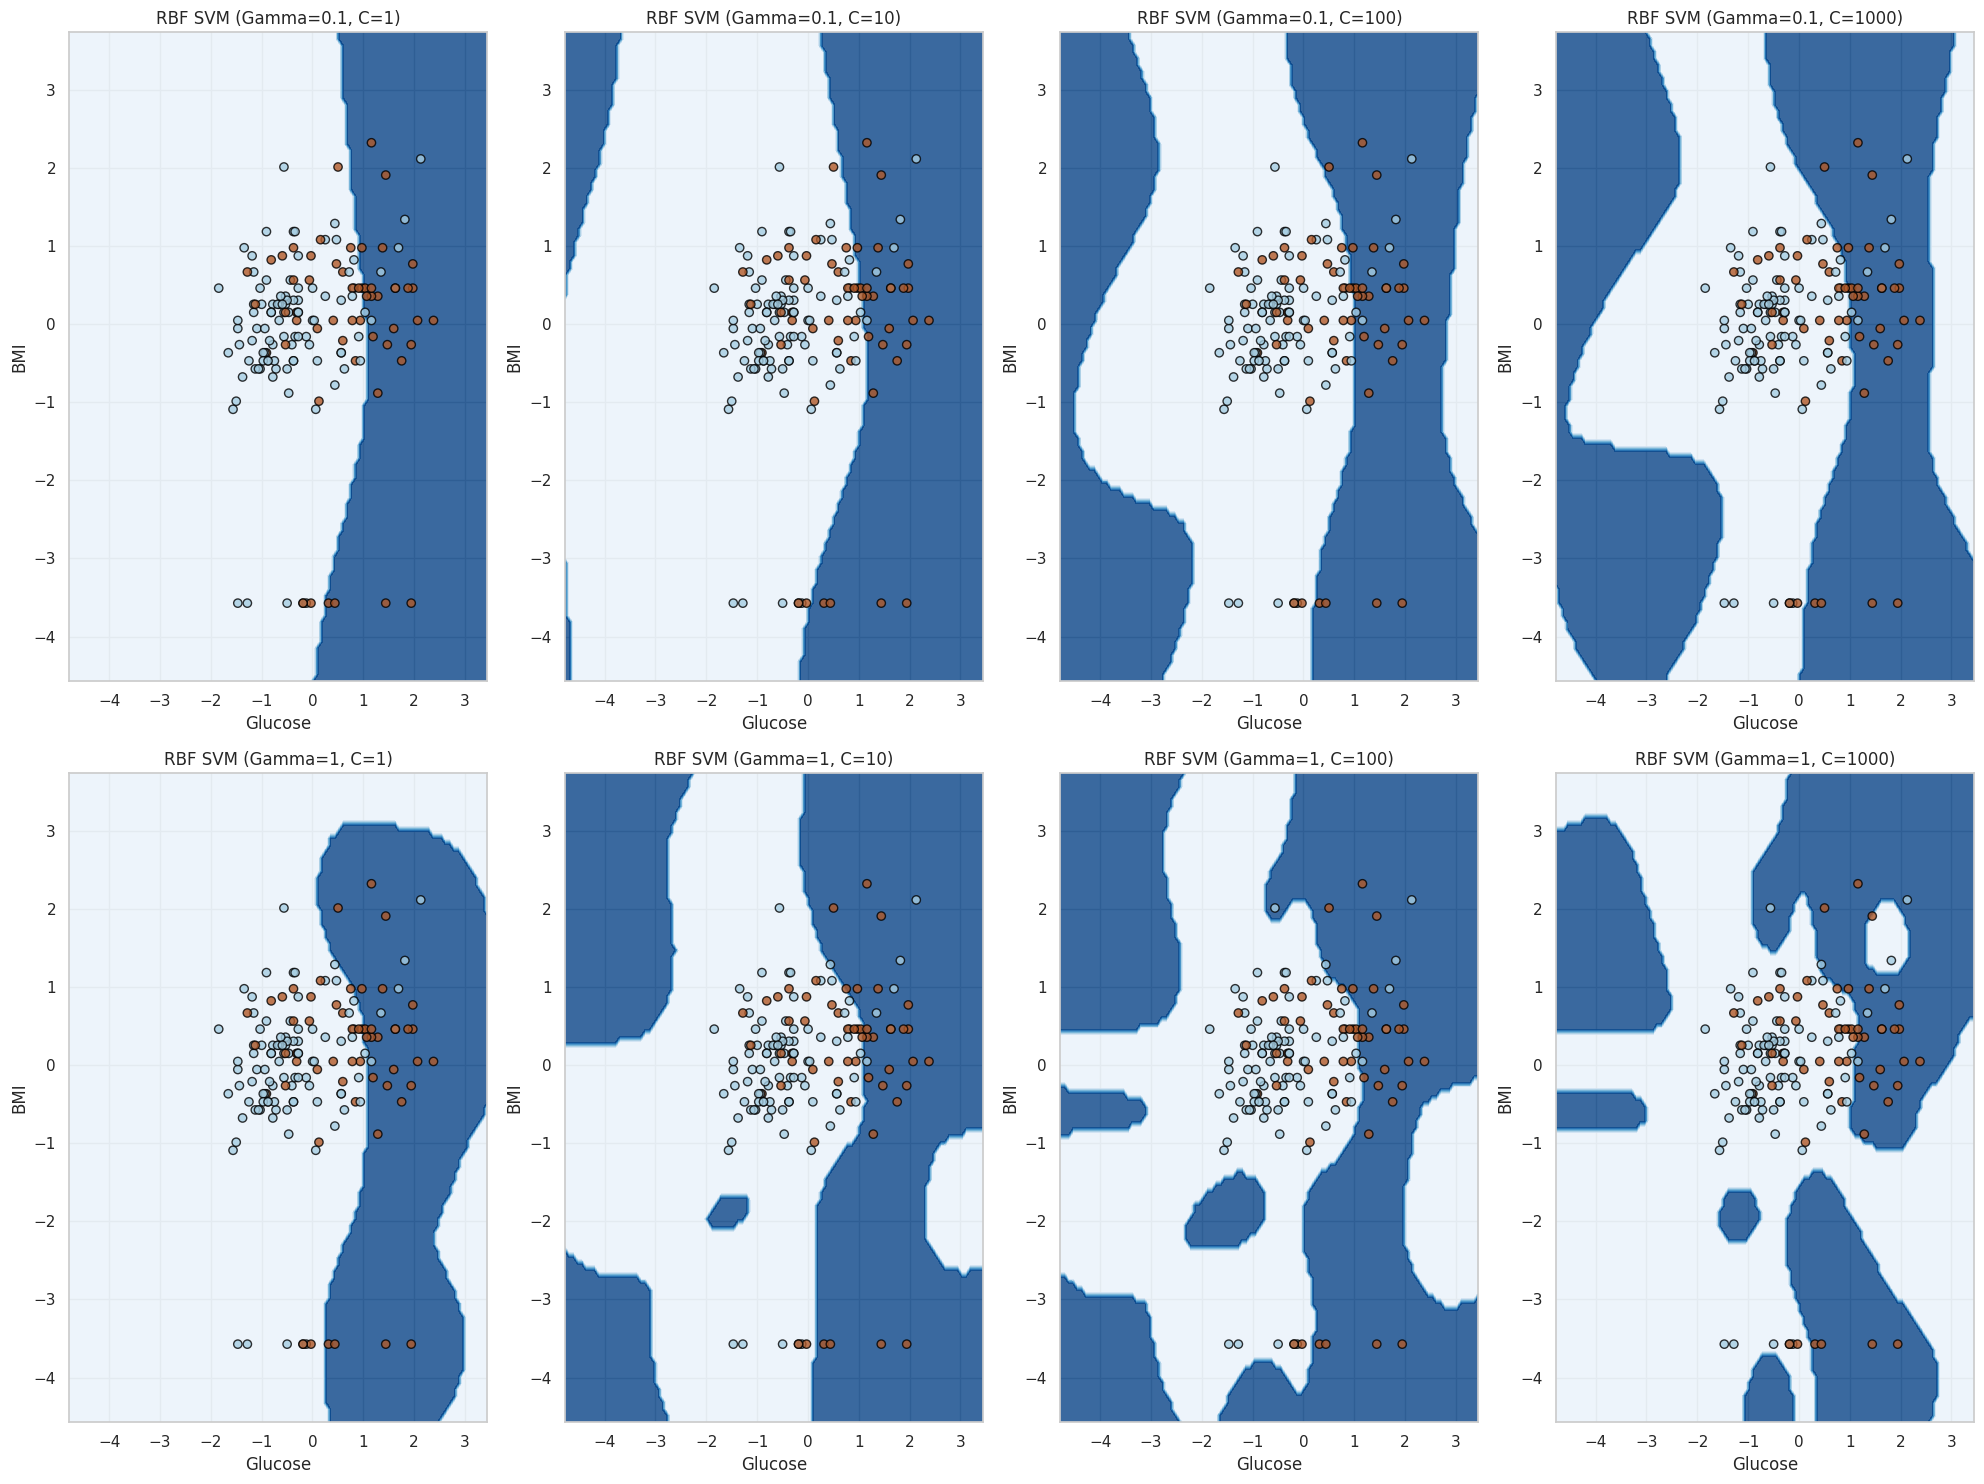

In [51]:
X_train_vis = X_train[['Glucose', 'BloodPressure']].values
X_test_vis  = X_test[['Glucose',  'BloodPressure']].values

gamma_values = [0.1, 1]
C_values = [1, 10, 100, 1000]


plt.figure(figsize=(20, 15))
subplot_index = 1

for gamma in gamma_values:
    for C in C_values:
        clf_rbf = SVC(degree= 1,  kernel= 'rbf', probability= True, random_state= 42, gamma=gamma, C=C)
        clf_rbf.fit(X_train_vis, y_train)

        x_min, x_max = X_train[numeric_features].iloc[:, 0].min() - 1, X_train[numeric_features].iloc[:, 0].max() + 1
        y_min, y_max = X_train[numeric_features].iloc[:, 1].min() - 1, X_train[numeric_features].iloc[:, 1].max() + 1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z_rbf = Z_rbf.reshape(xx.shape)
        
        plt.subplot(len(gamma_values), len(C_values), subplot_index)
        plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Blues, alpha=0.8)
        plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='black', alpha = 0.8)
        plt.title(f'RBF SVM (Gamma={gamma}, C={C})')
        plt.xlabel('Glucose')
        plt.ylabel('BMI')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
        subplot_index += 1

plt.tight_layout()
plt.show()


### Two Categoric Features with Pregnancies and glucose_age

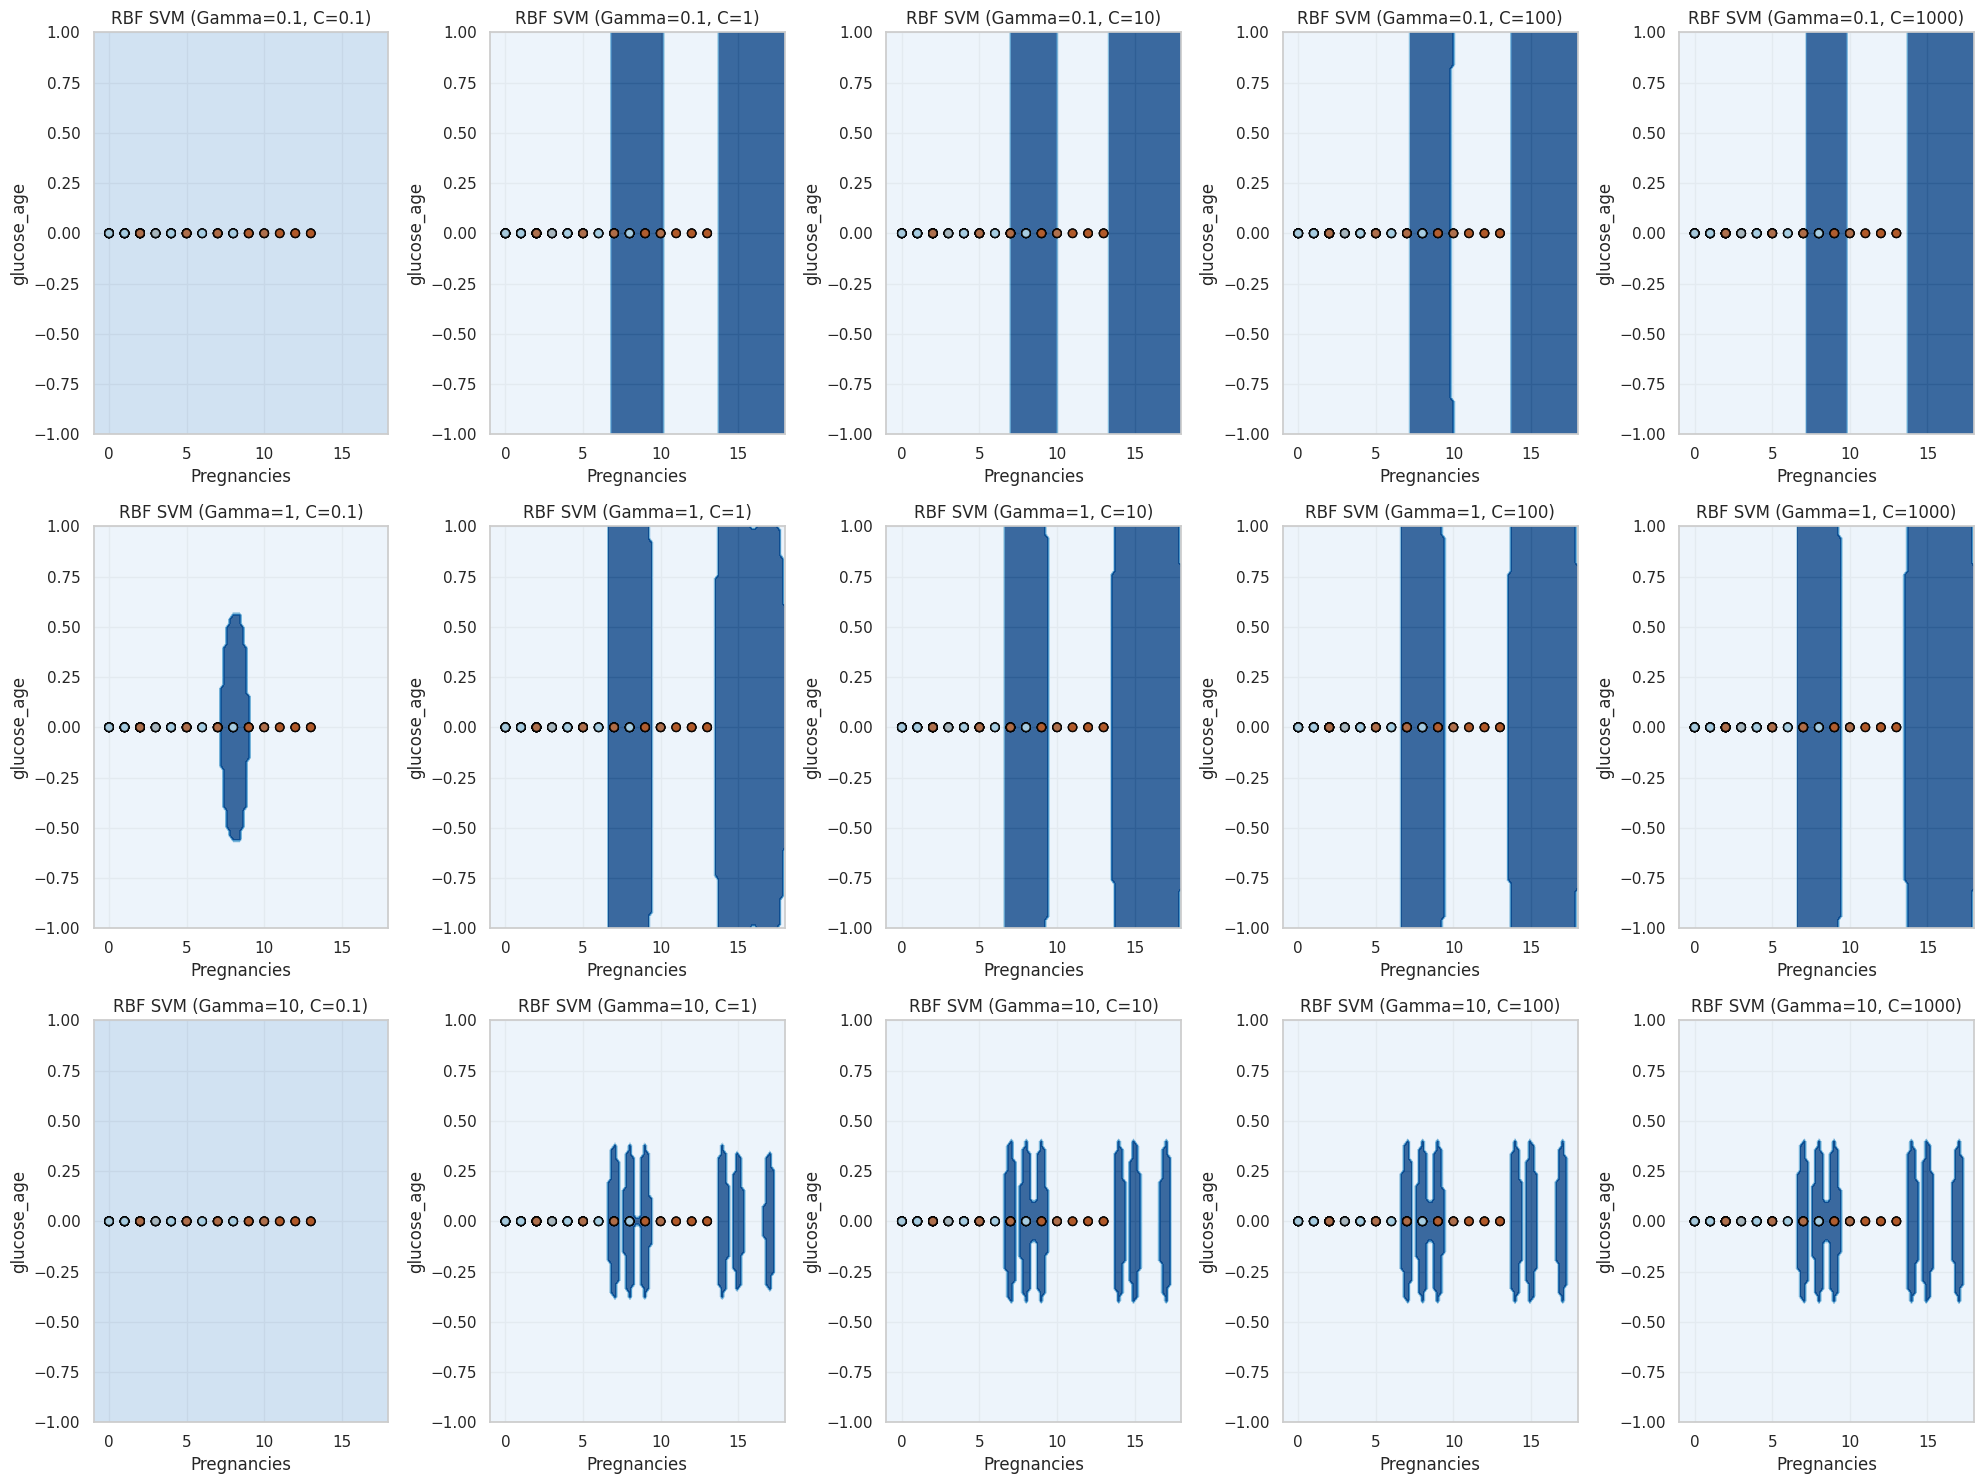

In [52]:
X_train_vis = X_train[['Pregnancies', 'glucose_age']].values
X_test_vis  = X_test[['Pregnancies',  'glucose_age']].values

gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10, 100, 1000]

plt.figure(figsize=(20, 15))
subplot_index = 1

for gamma in gamma_values:
    for C in C_values:
        clf_rbf = SVC(degree= 1,  kernel= 'rbf', probability= True, random_state= 42, gamma=gamma, C=C)
        clf_rbf.fit(X_train_vis, y_train)

        x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
        y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z_rbf = Z_rbf.reshape(xx.shape)
        
        plt.subplot(len(gamma_values), len(C_values), subplot_index)
        plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Blues, alpha=0.8)
        plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='black', alpha = 0.8)
        plt.title(f'RBF SVM (Gamma={gamma}, C={C})')
        plt.xlabel('Pregnancies')
        plt.ylabel('glucose_age')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
        subplot_index += 1

plt.tight_layout()
plt.show()


## Linear Kernel

### we will examine the combination of gamma and C Hyperparametes

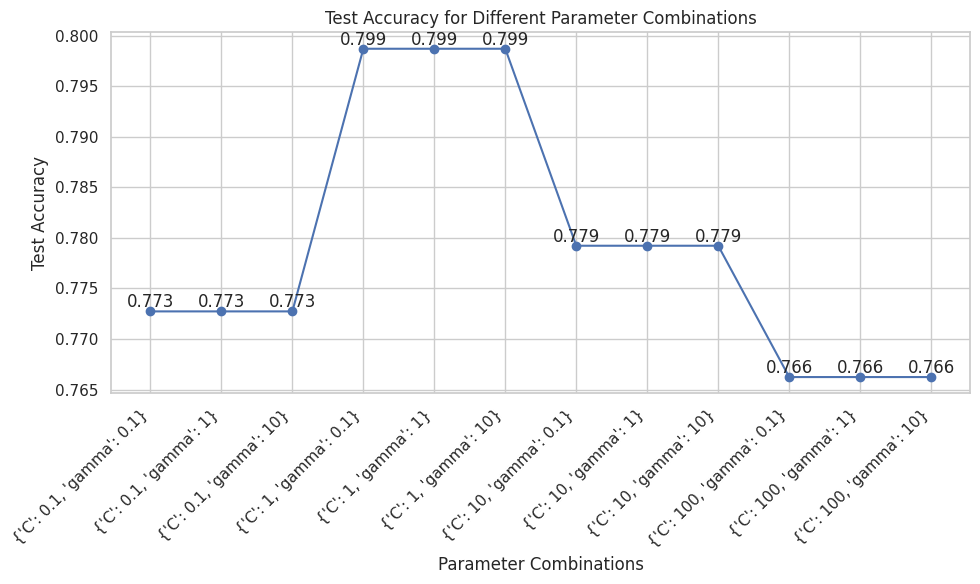

In [53]:
gamma_values = [0.1, 1, 10]
C_values = [0.1, 1, 10, 100]

svc = SVC(kernel='linear', probability=True, random_state=42)

param_grid = {'C': C_values, 'gamma': gamma_values}


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

test_scores = []
for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    svc.set_params(**params)  
    svc.fit(X_train, y_train)  

    test_score = svc.score(X_test, y_test)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(test_scores)), test_scores, marker='o', linestyle='-', color='b')
plt.xticks(np.arange(len(test_scores)), grid_search.cv_results_['params'], rotation=45, ha='right')
plt.xlabel('Parameter Combinations')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Parameter Combinations')
plt.grid(True)

for i, score in enumerate(test_scores):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

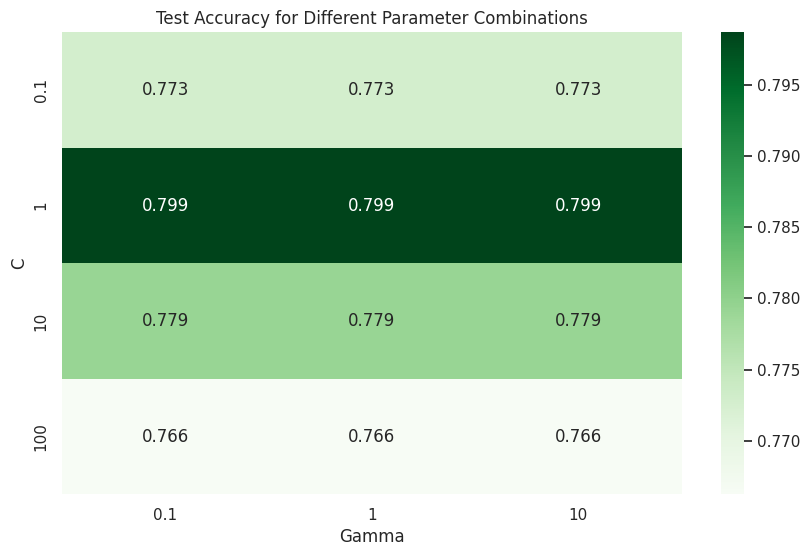

In [54]:
scores = np.array(test_scores).reshape(len(C_values), len(gamma_values))

plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=gamma_values, yticklabels=C_values, cmap="Greens")
plt.title('Test Accuracy for Different Parameter Combinations')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()


```(recall) Best Parameters for linear kernel: {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear', 'probability': True, 'random_state': 42}```
```Test Accuracy: 0.82```

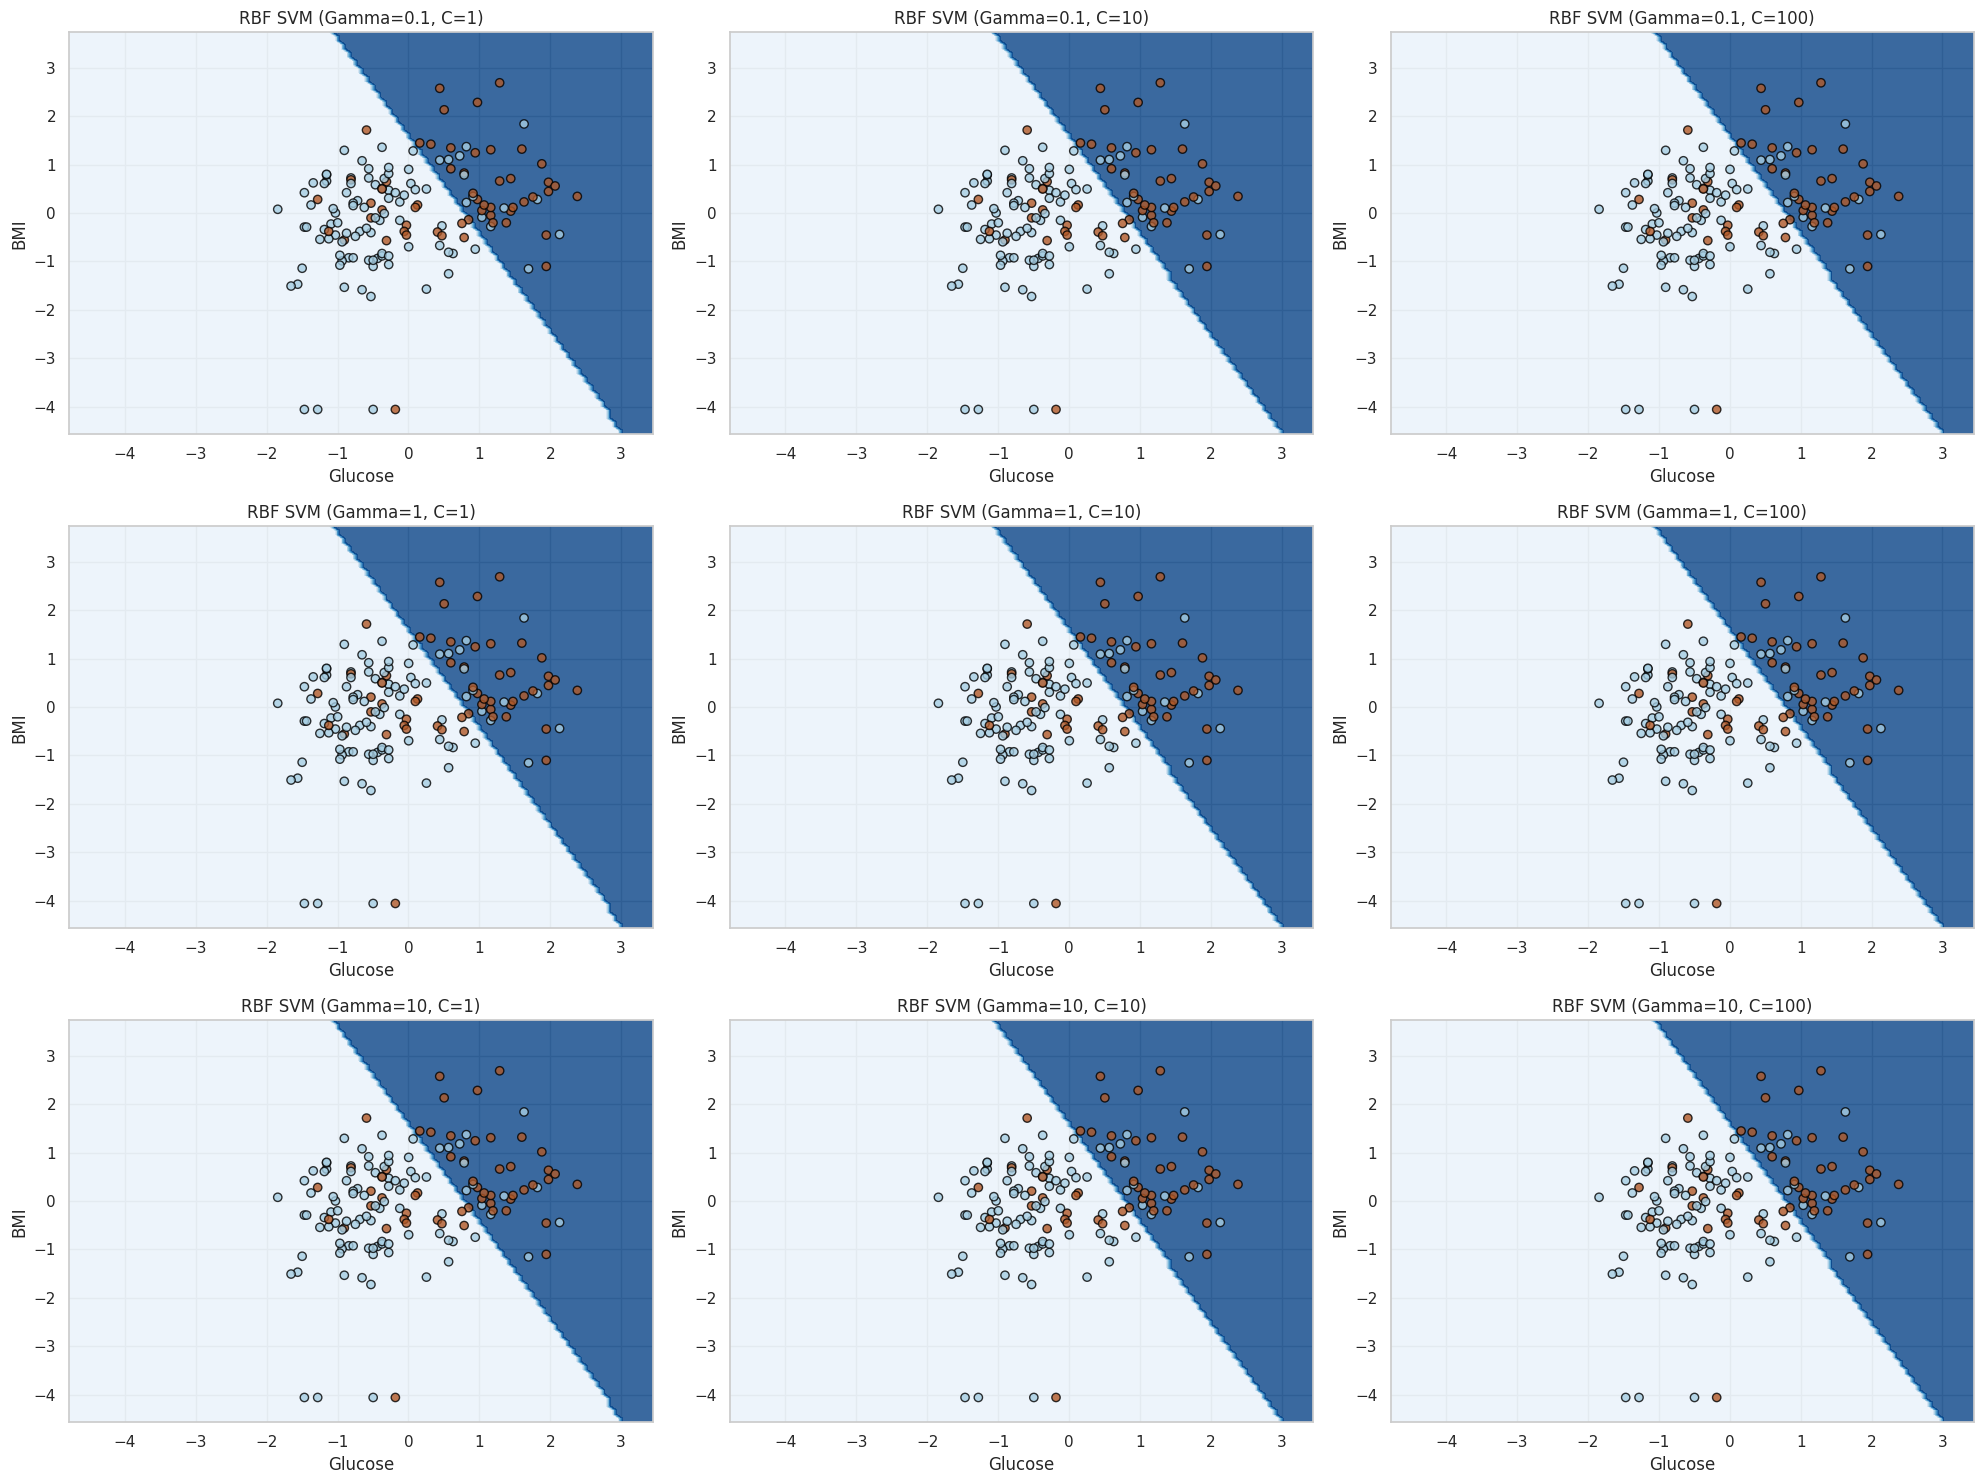

In [55]:
X_train_vis = X_train[['Glucose', 'BMI']].values
X_test_vis  = X_test[['Glucose', 'BMI']].values

gamma_values = [0.1, 1, 10]
C_values = [1, 10, 100]

plt.figure(figsize=(20, 15))
subplot_index = 1

for gamma in gamma_values:
    for C in C_values:
        clf_rbf = SVC(degree= 1,  kernel= 'linear', probability= True, random_state= 42, gamma=gamma, C=C)
        clf_rbf.fit(X_train_vis, y_train)

        x_min, x_max = X_train[numeric_features].iloc[:, 0].min() - 1, X_train[numeric_features].iloc[:, 0].max() + 1
        y_min, y_max = X_train[numeric_features].iloc[:, 1].min() - 1, X_train[numeric_features].iloc[:, 1].max() + 1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z_rbf = Z_rbf.reshape(xx.shape)
        
        plt.subplot(len(gamma_values), len(C_values), subplot_index)
        plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Blues, alpha=0.8)
        plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='black', alpha = 0.8)
        plt.title(f'RBF SVM (Gamma={gamma}, C={C})')
        plt.xlabel('Glucose')
        plt.ylabel('BMI')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        
        subplot_index += 1

plt.tight_layout()
plt.show()

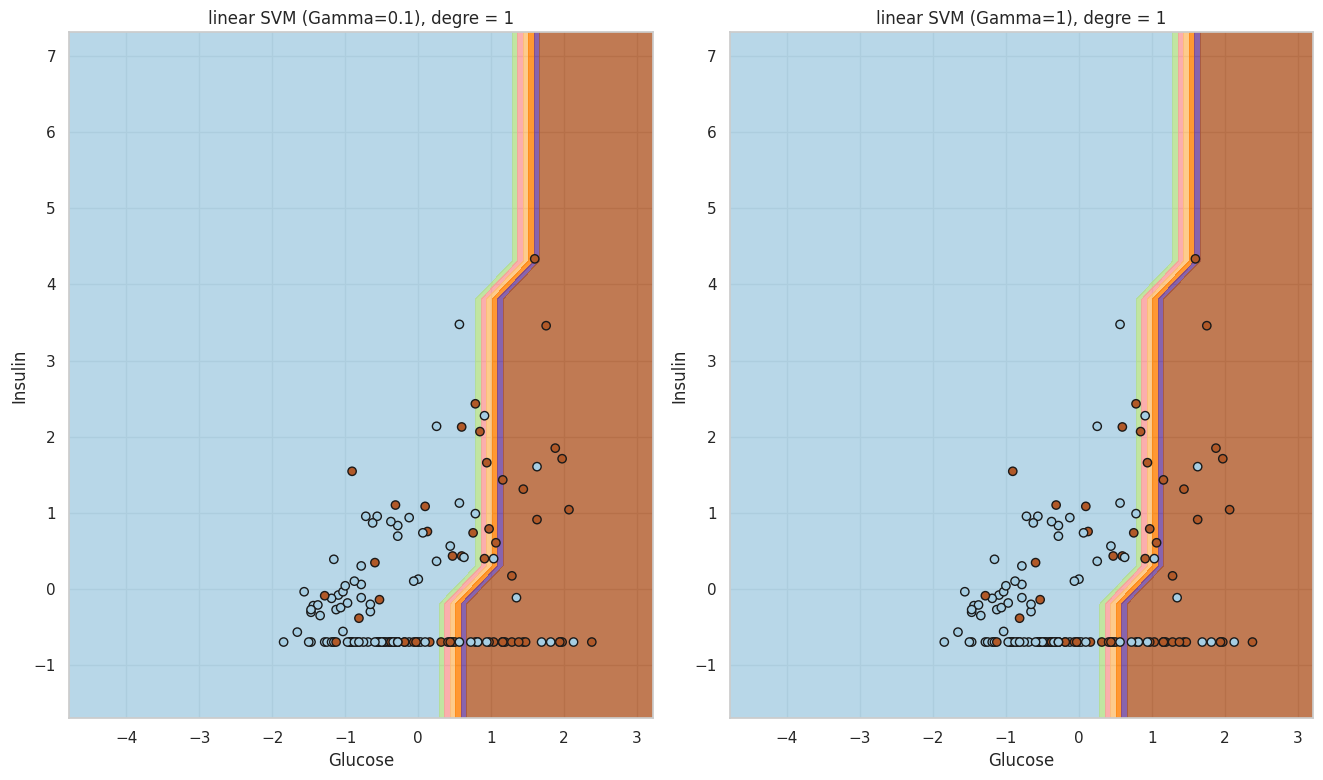

In [56]:
X_train_vis = X_train[['Glucose', 'Insulin']].values
X_test_vis = X_test[['Glucose', 'Insulin']].values

gamma_values = [0.1, 1]

plt.figure(figsize=(20, 15))
for i, gamma in enumerate(gamma_values, 1):

    clf_rbf = SVC(degree= 1,  kernel= 'linear', probability= True, random_state= 42, gamma=gamma, C=C)
    clf_rbf.fit(X_train_vis, y_train)


    h = 0.5  
    x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
    y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(f'linear SVM (Gamma={gamma}), degre = 1')
    plt.xlabel('Glucose')
    plt.ylabel('Insulin')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

## Polynomial Kernel 

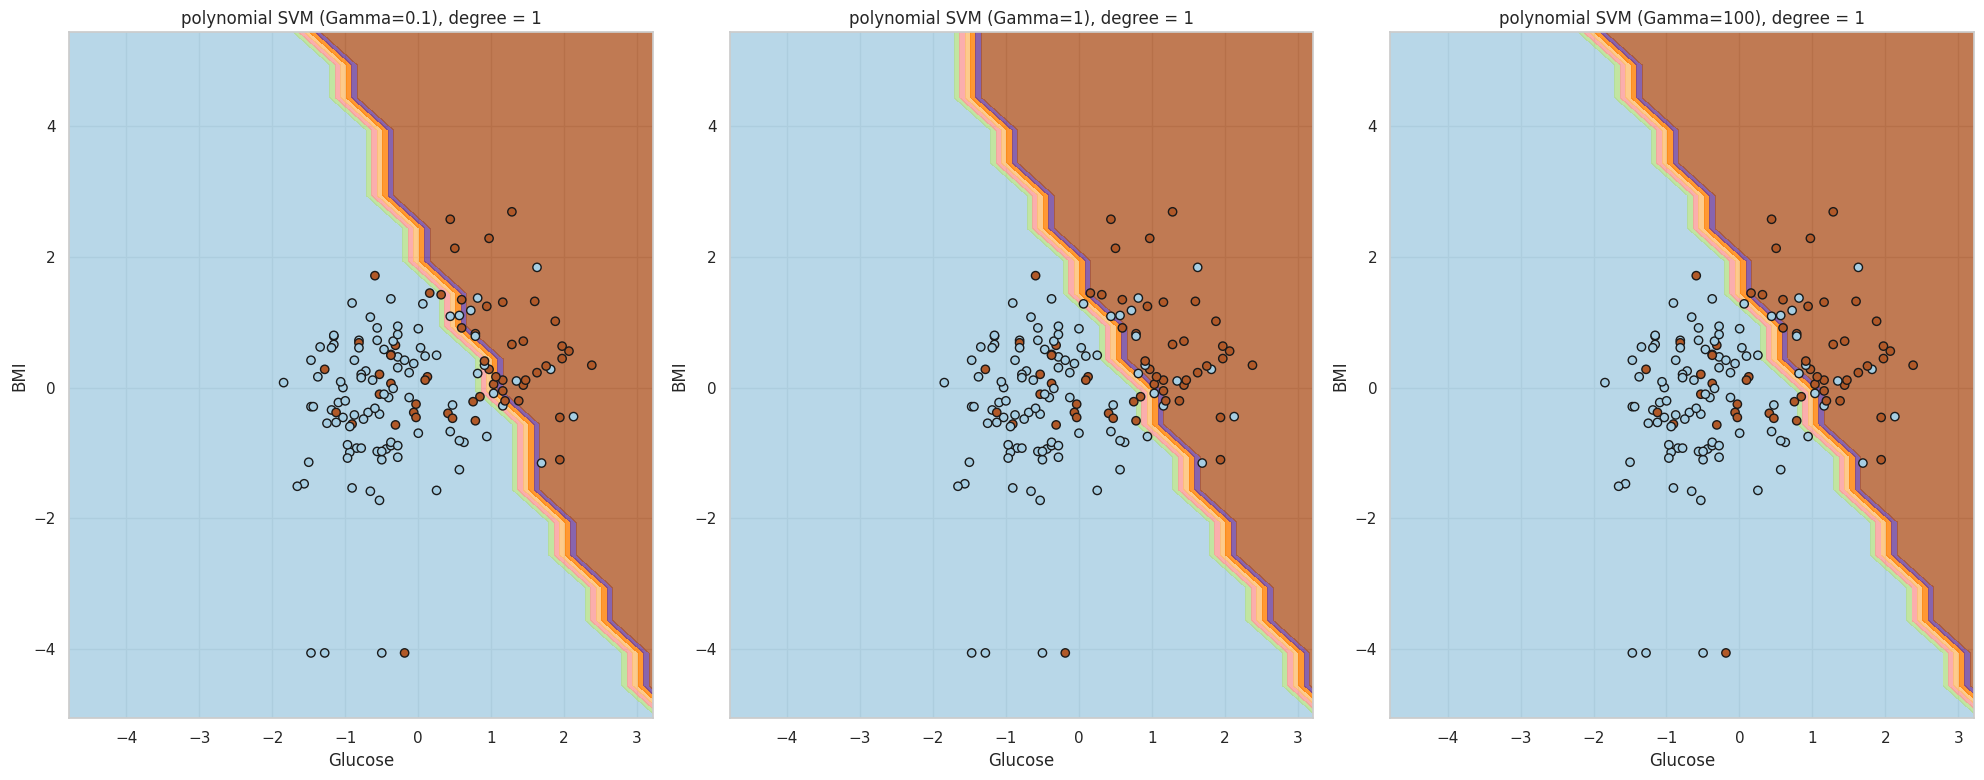

In [57]:
X_train_vis = X_train[['Glucose', 'BMI']].values
X_test_vis  = X_test[['Glucose', 'BMI']].values

gamma_values = [0.1, 1, 100]

plt.figure(figsize=(20, 15))
for i, gamma in enumerate(gamma_values, 1):

    clf_rbf = SVC(C= 0.1, degree= 1,  kernel= 'poly', probability= True, random_state= 42, gamma=gamma )
    clf_rbf.fit(X_train_vis, y_train)

    h = 0.5  
    x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
    y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(f'polynomial SVM (Gamma={gamma}), degree = 1')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

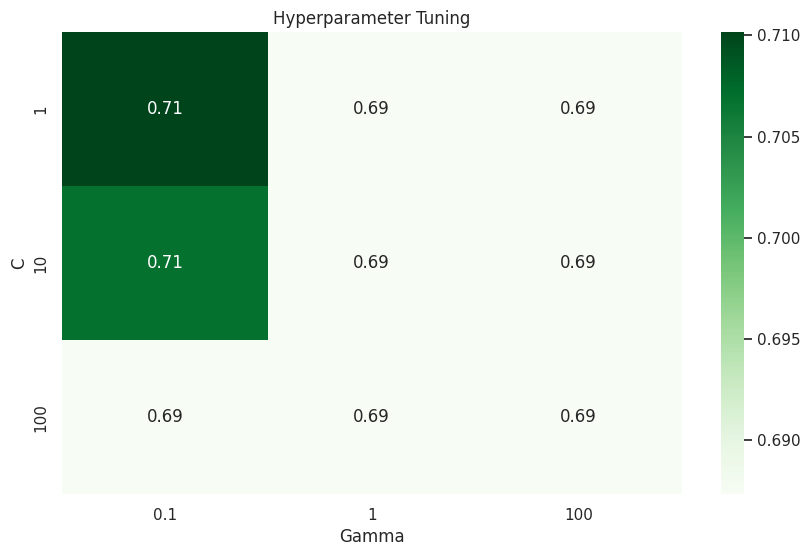

In [58]:

svc = SVC(kernel='poly')
param_grid = {'C': C_values, 'gamma': gamma_values}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']
scores = scores.reshape(len(C_values), len(gamma_values))


plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap='Greens')
plt.title('Hyperparameter Tuning')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

## Lastly, we will building a Stochastic Gradient Descent model with penalty = "hinge" -> it's SMV 

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hinge_loss
from sklearn.linear_model import SGDClassifier

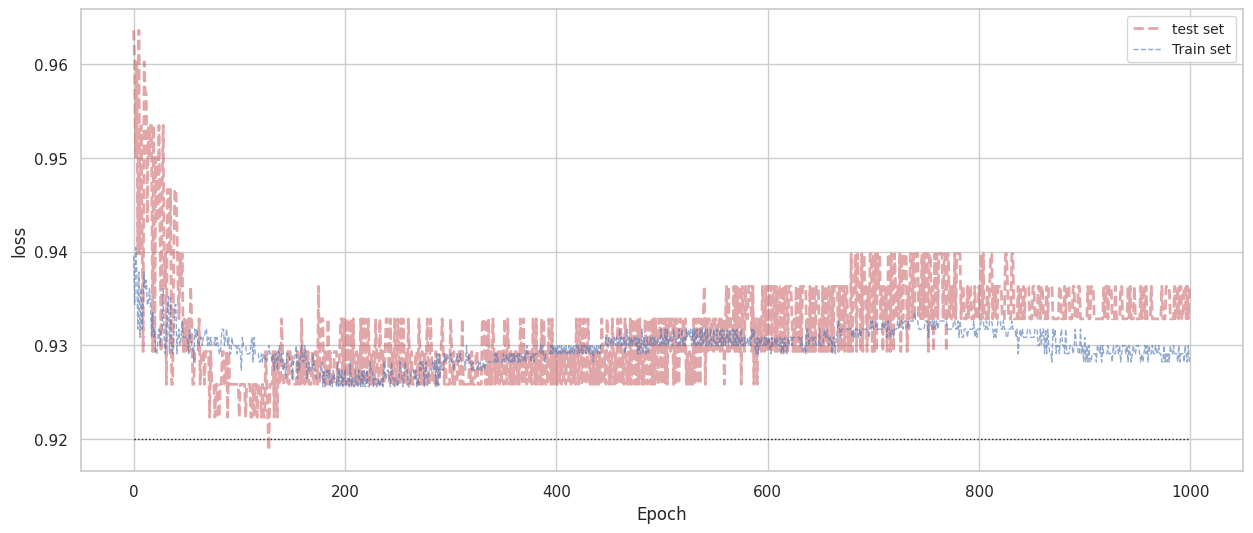

min loss score :  0.92
number of epoch :  128
Best Hyperparameter : SGDClassifier(alpha=0.01, eta0=0.01, l1_ratio=0.5, max_iter=100,
              penalty='elasticnet', random_state=42)


In [60]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  
    'l1_ratio': [0, 0.1, 0.2, 0.5, 0.7, 1.0], 
    'max_iter': [100, 200, 500],  
    'eta0': [0.01, 0.1],  
    'learning_rate': ['constant', 'optimal', 'invscaling'],  
    'penalty' : ['l1', 'l2', 'elasticnet']
}

sgd_clf = SGDClassifier(loss='hinge' , random_state=42)

grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_sgd_clf = grid_search.best_estimator_

n_epochs = 1000
train_loss, test_loss = [], []

for epoch in range(n_epochs):
    best_sgd_clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    train_pred = best_sgd_clf.predict(X_train)
    test_pred  = best_sgd_clf.predict(X_test)
    
    train_loss.append(hinge_loss(y_train, train_pred))
    test_loss.append(hinge_loss(y_test, test_pred))

best_epoch = np.argmin(test_loss)
best_test_loss = round(np.sqrt(test_loss[best_epoch]), 2)

plt.figure(figsize=(15, 6))
plt.plot([0, n_epochs], [best_test_loss, best_test_loss], "k:", linewidth=1)
plt.plot(np.sqrt(test_loss),  "r--",  linewidth=2, label="test set",  alpha = 0.5)
plt.plot(np.sqrt(train_loss), "b--", linewidth=1, label="Train set", alpha = 0.6)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("loss",  fontsize=12)
plt.show()


print("min loss score : ", best_test_loss)
print("number of epoch : ", best_epoch)
print("Best Hyperparameter :",grid_search.best_estimator_)

```we can select 128th epoch for best model ``` \
```we did early stopping```

In [61]:
for epoch in range(best_epoch):
    best_sgd_clf.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = best_sgd_clf.predict(X_test)

print("\n##--Best epoch Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--Best epoch Test Result--##

Test Scores
Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[85 14]
 [21 34]]


In [62]:
for epoch in range(700):
    best_sgd_clf.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = best_sgd_clf.predict(X_test)

print("\n##--700th epoch Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--700th epoch Test Result--##

Test Scores
Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
 [[84 15]
 [21 34]]


# Important Note for SVM and SGD
```C parameter in SVC multiplies the loss term. Increasing C will increase the penalty for misclassification. SVC uses liblinear library. ``` \
```You can find more information about the loss function and the C parameter on liblinear documentation:``` https://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf \
```alpha parameter in SGD multiplies the regularization term. There is no C parameter in SGD because you can use SGD with different loss functions and regularization methods. ``` \
```In their effect, C and alpha are inversely related: increasing C in SVC and decreasing alpha in SGD will lead to overfitting.```

[source](https://stats.stackexchange.com/questions/451069/svm-getting-number-of-support-vectors-number-and-relationship-between-c-and-alp?rq=1)